In [1]:
# Google Drive mount for colab
#from google.colab import drive
#drive.mount('/content/drive')

# After mounting, /drive/MyDrive/ should appear on the left in Files tab
# Go to your own Google Drive, create a /cz4041/ folder, and upload the zip and csv files there
# It should appear in the files tab under /drive/MyDrive/cz4041/

# Exploratory Data Analysis

In [2]:
# import packages
import os
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import seaborn as sns
from tqdm import tqdm
from IPython.display import display

# pandas display options
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 300)
pd.set_option('float_format', '{:,.2f}'.format) # All float will be displayed in 2 d.p. with comma to separate thousands

In [3]:
# datasets paths
path = "../data"
#path = "/content/drive/MyDrive/cz4041/" # path to Google Drive, for colab
macro = os.path.join(path, "macro.csv")
train = os.path.join(path, "train.zip")
test = os.path.join(path,  "test.zip")

# place all datasets paths in a datasets dict
datasets = {}
datasets['macro'] = macro
datasets['train'] = train
datasets['test'] = test

# load dataframes into dfs dict
dfs = {}
for dataset_name, path in datasets.items():
    df = pd.read_csv(path)
    dfs[dataset_name] = df

# assign to own df variables when you want to use them individually
df_macro = dfs['macro']
df_train = dfs['train']
df_test = dfs['test']

## Overview of datasets

**Dataset size & Number of distinct datatypes**

In [4]:
for dataset_name, df in dfs.items():
    print("====== Dataset size - {}: {} ======".format(dataset_name , df.shape))
    print("Number of distinct datatypes: \n{}".format(df.dtypes.map(type).value_counts()))

====== Dataset size - macro: (2484, 100) ======
Number of distinct datatypes: 
<class 'numpy.dtype[float64]'>    94
<class 'numpy.dtype[object_]'>     4
<class 'numpy.dtype[int64]'>       2
dtype: int64
====== Dataset size - train: (30471, 292) ======
Number of distinct datatypes: 
<class 'numpy.dtype[int64]'>      157
<class 'numpy.dtype[float64]'>    119
<class 'numpy.dtype[object_]'>     16
dtype: int64
====== Dataset size - test: (7662, 291) ======
Number of distinct datatypes: 
<class 'numpy.dtype[int64]'>      159
<class 'numpy.dtype[float64]'>    116
<class 'numpy.dtype[object_]'>     16
dtype: int64


**Display top 5 rows for dataset**

In [5]:
for dataset_name, df in dfs.items():
    print("Display top 5 rows for dataset: {}".format(dataset_name))
    display(df.head(5))

Display top 5 rows for dataset: macro


timestamp  oil_urals  gdp_quart  gdp_quart_growth  cpi  ppi  gdp_deflator  \
0  2010-01-01      76.10        NaN               NaN  NaN  NaN           NaN   
1  2010-01-02      76.10        NaN               NaN  NaN  NaN           NaN   
2  2010-01-03      76.10        NaN               NaN  NaN  NaN           NaN   
3  2010-01-04      76.10        NaN               NaN  NaN  NaN           NaN   
4  2010-01-05      76.10        NaN               NaN  NaN  NaN           NaN   

   balance_trade  balance_trade_growth  usdrub  eurrub  brent  \
0            NaN                   NaN     NaN     NaN    NaN   
1            NaN                   NaN     NaN     NaN    NaN   
2            NaN                   NaN     NaN     NaN    NaN   
3            NaN                   NaN   29.91   43.41  80.12   
4            NaN                   NaN   29.84   42.96  80.59   

   net_capital_export  gdp_annual  gdp_annual_growth  \
0                 NaN   38,807.20              -0.08   
1                 NaN   38,807.20              -0.08   
2                 NaN   38,807.20              -0.08   
3                 NaN   38,807.20              -0.08   
4                 NaN   38,807.20              -0.08   

   average_provision_of_build_contract  \
0                                 5.00   
1                                 5.00   
2                                 5.00   
3                                 5.00   
4                                 5.00   

   average_provision_of_build_contract_moscow  rts  micex  micex_rgbi_tr  \
0                                         NaN  NaN    NaN            NaN   
1                                         NaN  NaN    NaN            NaN   
2                                         NaN  NaN    NaN            NaN   
3                                         NaN  NaN    NaN            NaN   
4                                         NaN  NaN    NaN            NaN   

   micex_cbi_tr  deposits_value  deposits_growth  deposits_rate  \
0           NaN         7484970              NaN            NaN   
1        175.15         7484970              NaN            NaN   
2        178.66         7484970              NaN            NaN   
3        183.44         7484970              NaN            NaN   
4        183.44         7484970              NaN            NaN   

   mortgage_value  mortgage_growth  mortgage_rate      grp  grp_growth  \
0          142968              NaN          13.72 8,375.86         NaN   
1          142968              NaN          13.72 8,375.86         NaN   
2          142968              NaN          13.72 8,375.86         NaN   
3          142968              NaN          13.72 8,375.86         NaN   
4          142968              NaN          13.72 8,375.86         NaN   

   income_per_cap  real_dispos_income_per_cap_growth    salary  salary_growth  \
0       30,789.20                               0.04 38,410.50            NaN   
1       30,789.20                               0.04 38,410.50            NaN   
2       30,789.20                               0.04 38,410.50            NaN   
3       30,789.20                               0.04 38,410.50            NaN   
4       30,789.20                               0.04 38,410.50            NaN   

   fixed_basket  retail_trade_turnover  retail_trade_turnover_per_cap  \
0     11,443.63               2,882.42                         251.48   
1     11,443.63               2,882.42                         251.48   
2     11,443.63               2,882.42                         251.48   
3     11,443.63               2,882.42                         251.48   
4     11,443.63               2,882.42                         251.48   

   retail_trade_turnover_growth  labor_force  unemployment  employment  \
0                        106.80     6,436.24          0.02        0.69   
1                        106.80     6,436.24          0.02        0.69   
2                        106.80     6,436.24          0.02        0.69   
3        

Display top 5 rows for dataset: train


id   timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
0   1  2011-08-20       43    27.00   4.00        NaN       NaN         NaN   
1   2  2011-08-23       34    19.00   3.00        NaN       NaN         NaN   
2   3  2011-08-27       43    29.00   2.00        NaN       NaN         NaN   
3   4  2011-09-01       89    50.00   9.00        NaN       NaN         NaN   
4   5  2011-09-05       77    77.00   4.00        NaN       NaN         NaN   

   num_room  kitch_sq  state product_type           sub_area        area_m  \
0       NaN       NaN    NaN   Investment           Bibirevo  6,407,578.10   
1       NaN       NaN    NaN   Investment  Nagatinskij Zaton  9,589,336.91   
2       NaN       NaN    NaN   Investment     Tekstil'shhiki  4,808,269.83   
3       NaN       NaN    NaN   Investment             Mitino 12,583,535.69   
4       NaN       NaN    NaN   Investment          Basmannoe  8,398,460.62   

   raion_popul  green_zone_part  indust_part  children_preschool  \
0       155572             0.19         0.00                9576   
1       115352             0.37         0.05                6880   
2       101708             0.11         0.12                5879   
3       178473             0.19         0.07               13087   
4       108171             0.02         0.04                5706   

   preschool_quota  preschool_education_centers_raion  children_school  \
0         5,001.00                                  5            10309   
1         3,119.00                                  5             7759   
2         1,463.00                                  4             6207   
3         6,839.00                                  9            13670   
4         3,240.00                                  7             6748   

   school_quota  school_education_centers_raion  \
0     11,065.00                               5   
1      6,237.00                               8   
2      5,580.00                               7   
3     17,063.00                              10   
4      7,770.00                               9   

   school_education_centers_top_20_raion  hospital_beds_raion  \
0                                      0               240.00   
1                                      0               229.00   
2                                      0             1,183.00   
3                                      0                  NaN   
4                                      0               562.00   

   healthcare_centers_raion  university_top_20_raion  sport_objects_raion  \
0                         1                        0                    7   
1                         1                        0                    6   
2                         1                        0                    5   
3                         1                        0                   17   
4                         4                        2                   25   

   additional_education_raion culture_objects_top_25  \
0                           3                     no   
1                           1                    yes   
2                           1                     no   
3                           6                     no   
4                           2                     no   

   culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
0                             0                      16             1   
1                             1                       3             0   
2                             0                       0             1   
3                             0                      11             4   
4                             0                      10            93   

  thermal_power_plant_raion incineration_raion oil_chemistry_raion  \
0                        no                 no                  no   
1                        no                 no                  no   
2                        no                 no            

Display top 5 rows for dataset: test


id   timestamp  full_sq  life_sq  floor  max_floor  material  \
0  30474  2015-07-01    39.00    20.70      2          9         1   
1  30475  2015-07-01    79.20      NaN      8         17         1   
2  30476  2015-07-01    40.50    25.10      3          5         2   
3  30477  2015-07-01    62.80    36.00     17         17         1   
4  30478  2015-07-01    40.00    40.00     17         17         1   

   build_year  num_room  kitch_sq  state   product_type  \
0    1,998.00         1      8.90   3.00     Investment   
1        0.00         3      1.00   1.00  OwnerOccupier   
2    1,960.00         2      4.80   2.00     Investment   
3    2,016.00         2     62.80   3.00  OwnerOccupier   
4        0.00         1      1.00   1.00  OwnerOccupier   

                  sub_area        area_m  raion_popul  green_zone_part  \
0           Juzhnoe Butovo 26,155,137.04       178264             0.14   
1     Poselenie Vnukovskoe 25,536,296.81         4001             0.50   
2                   Perovo  9,946,335.11       139322             0.07   
3  Poselenie Voskresenskoe 21,494,094.80         7122             0.26   
4     Poselenie Vnukovskoe 25,536,296.81         4001             0.50   

   indust_part  children_preschool  preschool_quota  \
0         0.04               14080        11,926.00   
1         0.01                 275              NaN   
2         0.23                6400         2,232.00   
3         0.02                 489              NaN   
4         0.01                 275              NaN   

   preschool_education_centers_raion  children_school  school_quota  \
0                                 11            14892     24,750.00   
1                                  0              264           NaN   
2                                  7             6558      7,966.00   
3                                  0              469           NaN   
4                                  0              264           NaN   

   school_education_centers_raion  school_education_centers_top_20_raion  \
0                              13                                      1   
1                               0                                      0   
2                               7                                      0   
3                               0                                      0   
4                               0                                      0   

   hospital_beds_raion  healthcare_centers_raion  university_top_20_raion  \
0                  NaN                         1                        0   
1                  NaN                         0                        0   
2             1,548.00                         3                        0   
3                  NaN                         0                        0   
4                  NaN                         0                        0   

   sport_objects_raion  additional_education_raion culture_objects_top_25  \
0                   13                           4                     no   
1                    0                           0                     no   
2                   13                           0                     no   
3                    0                           2                     no   
4                    0                           0                     no   

   culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
0                             0                       4             4   
1                             0                       1             0   
2                             0                       2             7   
3                             0                       0             0   
4                             0                       1             0   

  thermal_power_plant_raion incineration_raion oil_chemistry_raion  \
0                        no                 no                  no   
1                        no                 no                  n

**Display descriptive statistics for dataset**

In [6]:
for dataset_name, df in dfs.items():
    print("Display descriptive statistics for dataset: {}".format(dataset_name))
    display(df.describe())

Display descriptive statistics for dataset: macro


oil_urals  gdp_quart  gdp_quart_growth      cpi      ppi  gdp_deflator  \
count   2,484.00   2,394.00          2,394.00 2,453.00 2,453.00      2,119.00   
mean       86.47  16,993.23              1.52   407.81   480.22        110.12   
std        27.53   3,187.07              2.88    65.90    70.29         14.82   
min        29.11   9,995.80             -4.50   315.10   337.20         86.72   
25%        61.28  14,925.00              0.40   354.00   438.40        100.00   
50%       101.42  17,442.10              1.30   393.00   473.50        108.30   
75%       109.31  19,284.10              4.10   469.40   520.70        123.66   
max       122.52  22,016.10              5.20   531.00   606.10        133.16   

       balance_trade  balance_trade_growth   usdrub   eurrub    brent  \
count       2,453.00              2,394.00 2,481.00 2,481.00 2,481.00   
mean           15.34                 16.85    40.73    50.44    88.18   
std             3.88                 16.99    15.01    13.91    26.96   
min             5.82                 -4.10    27.28    37.45    27.88   
25%            12.79                  7.20    30.51    40.24    63.34   
50%            16.04                 10.50    32.32    42.86   101.56   
75%            18.08                 21.50    53.75    61.32   109.99   
max            21.94                 75.80    82.28    90.88   126.65   

       net_capital_export  gdp_annual  gdp_annual_growth  \
count            2,088.00    2,484.00           2,484.00   
mean                -0.04   62,557.07               0.01   
std                  0.27   14,503.68               0.04   
min                 -0.52   38,807.20              -0.08   
25%                 -0.24   46,308.50              -0.04   
50%                 -0.07   66,926.90               0.01   
75%                  0.15   77,945.10               0.04   
max                  0.61   80,804.30               0.05   

       average_provision_of_build_contract  \
count                             2,484.00   
mean                                  5.77   
std                                   0.54   
min                                   4.00   
25%                                   5.75   
50%                                   5.94   
75%                                   6.07   
max                                   6.46   

       average_provision_of_build_contract_moscow      rts    micex  \
count                                    2,119.00 2,474.00 2,474.00   
mean                                         6.56 1,314.54 1,553.80   
std                                          0.45   334.60   180.79   
min                                          5.96   628.41 1,197.39   
25%                                          6.18   988.07 1,416.50   
50%                                          6.59 1,377.38 1,496.88   
75%                                          6.75 1,525.90 1,686.29   
max                                          7.83 2,123.56 2,053.75   

       micex_rgbi_tr  micex_cbi_tr  deposits_value  deposits_growth  \
count       2,474.00      2,483.00        2,484.00         2,453.00   
mean          129.03        233.73   15,041,696.69             0.01   
std             7.10         35.58    4,762,312.34             0.02   
min            97.86        171.15    7,484,970.00            -0.02   
25%           126.13        205.30   10,876,079.00             0.00   
50%           131.28        233.00   15,210,054.00             0.01   
75%           132.97        248.39   19,077,332.00             0.02   
max           141.65        314.30   23,453,188.00             0.08   

       deposits_rate  mortgage_value  mortgage_growth  mortgage_rate  \
count       2,070.00        2,484.00         2,119.00       2,484.00   
mean            6.30      500,798.07             0.43          12.66   
std             1.90      394,604.98             0.48           0.66   
min             4.00        8,016.00            -0.41          11.40   
25%             5.20   

Display descriptive statistics for dataset: train


id   full_sq   life_sq     floor  max_floor  material  \
count 30,471.00 30,471.00 24,088.00 30,304.00  20,899.00 20,899.00   
mean  15,237.92     54.21     34.40      7.67      12.56      1.83   
std    8,796.50     38.03     52.29      5.32       6.76      1.48   
min        1.00      0.00      0.00      0.00       0.00      1.00   
25%    7,620.50     38.00     20.00      3.00       9.00      1.00   
50%   15,238.00     49.00     30.00      6.50      12.00      1.00   
75%   22,855.50     63.00     43.00     11.00      17.00      2.00   
max   30,473.00  5,326.00  7,478.00     77.00     117.00      6.00   

         build_year  num_room  kitch_sq     state         area_m  raion_popul  \
count     16,866.00 20,899.00 20,899.00 16,912.00      30,471.00    30,471.00   
mean       3,068.06      1.91      6.40      2.11  17,657,051.42    84,056.43   
std      154,387.80      0.85     28.27      0.88  20,649,607.99    57,871.29   
min            0.00      0.00      0.00      1.00   2,081,627.76     2,546.00   
25%        1,967.00      1.00      1.00      1.00   7,307,410.57    21,819.00   
50%        1,979.00      2.00      6.00      2.00  10,508,030.10    83,502.00   
75%        2,005.00      2.00      9.00      3.00  18,036,436.51   122,862.00   
max   20,052,009.00     19.00  2,014.00     33.00 206,071,809.20   247,469.00   

       green_zone_part  indust_part  children_preschool  preschool_quota  \
count        30,471.00    30,471.00           30,471.00        23,783.00   
mean              0.22         0.12            5,140.03         3,271.27   
std               0.18         0.12            3,816.63         2,169.76   
min               0.00         0.00              175.00             0.00   
25%               0.06         0.02            1,706.00         1,874.00   
50%               0.17         0.07            4,857.00         2,854.00   
75%               0.34         0.20            7,103.00         4,050.00   
max               0.85         0.52           19,223.00        11,926.00   

       preschool_education_centers_raion  children_school  school_quota  \
count                          30,471.00        30,471.00     23,786.00   
mean                                4.07         5,354.27      8,324.97   
std                                 2.99         3,989.64      4,289.73   
min                                 0.00           168.00      1,012.00   
25%                                 2.00         1,564.00      5,782.00   
50%                                 4.00         5,261.00      7,377.00   
75%                                 6.00         7,227.00      9,891.00   
max                                13.00        19,083.00     24,750.00   

       school_education_centers_raion  school_education_centers_top_20_raion  \
count                       30,471.00                              30,471.00   
mean                             4.71                                   0.11   
std                              3.45                                   0.33   
min                              0.00                                   0.00   
25%                              2.00                                   0.00   
50%                              5.00                                   0.00   
75%                              7.00                                   0.00   
max                             14.00                                   2.00   

       hospital_beds_raion  healthcare_centers_raion  university_top_20_raion  \
count            16,030.00                 30,471.00                30,471.00   
mean              1,190.74                      1.32                     0.14   
std               1,057.02                      1.49                     0.44   
min                   0.00                      0.00                     0.00   
25%                 520.00                      0.00                     0.00   
50%                 990.00                      1.00                     0.00   
75%

Display descriptive statistics for dataset: test


id  full_sq  life_sq    floor  max_floor  material  build_year  \
count  7,662.00 7,662.00 6,486.00 7,662.00   7,662.00  7,662.00    6,613.00   
mean  34,304.50    53.70    32.66     7.65      12.59      1.85    1,820.89   
std    2,211.97    20.10    22.74     5.10       6.66      1.52      552.99   
min   30,474.00     0.00     0.00     1.00       0.00      1.00        0.00   
25%   32,389.25    39.20    19.90     4.00       9.00      1.00    1,966.00   
50%   34,304.50    50.41    30.40     7.00      14.00      1.00    1,982.00   
75%   36,219.75    63.30    41.80    11.00      17.00      2.00    2,011.00   
max   38,135.00   403.00   869.00    41.00      48.00      6.00    2,019.00   

       num_room  kitch_sq    state         area_m  raion_popul  \
count  7,662.00  7,662.00 6,968.00       7,662.00     7,662.00   
mean       1.88      6.94     1.99  17,685,763.60    87,522.52   
std        0.84     25.58     0.82  22,107,275.74    56,306.19   
min        1.00      0.00     1.00   2,081,627.76     2,546.00   
25%        1.00      1.00     1.00   7,307,410.57    37,502.00   
50%        2.00      7.00     2.00  10,053,051.74    85,956.00   
75%        2.00      9.50     3.00  17,881,913.61   118,945.00   
max       19.00  1,968.00     4.00 206,071,809.20   247,469.00   

       green_zone_part  indust_part  children_preschool  preschool_quota  \
count         7,662.00     7,662.00            7,662.00         6,066.00   
mean              0.23         0.12            5,355.36         3,260.33   
std               0.18         0.13            3,768.69         2,171.25   
min               0.00         0.00              175.00             0.00   
25%               0.07         0.01            2,459.00         1,838.00   
50%               0.17         0.07            4,992.00         3,062.00   
75%               0.35         0.20            7,125.00         3,953.00   
max               0.85         0.52           19,223.00        11,926.00   

       preschool_education_centers_raion  children_school  school_quota  \
count                           7,662.00         7,662.00      6,067.00   
mean                                4.03         5,569.57      8,205.41   
std                                 2.97         3,915.07      4,355.16   
min                                 0.00           168.00      1,012.00   
25%                                 2.00         2,423.00      5,692.00   
50%                                 4.00         5,487.00      6,974.00   
75%                                 6.00         7,614.00      9,748.00   
max                                13.00        19,083.00     24,750.00   

       school_education_centers_raion  school_education_centers_top_20_raion  \
count                        7,662.00                               7,662.00   
mean                             4.76                                   0.11   
std                              3.47                                   0.33   
min                              0.00                                   0.00   
25%                              2.00                                   0.00   
50%                              5.00                                   0.00   
75%                              7.00                                   0.00   
max                             14.00                                   2.00   

       hospital_beds_raion  healthcare_centers_raion  university_top_20_raion  \
count             4,244.00                  7,662.00                 7,662.00   
mean              1,204.34                      1.40                     0.15   
std               1,070.98                      1.46                     0.46   
min                   0.00                      0.00                     0.00   
25%                 325.00                      0.00                     0.00   
50%                 990.00                      1.00                     0.00   
75%               1,894.00                      3.00     

## Check for Missing Values

In [7]:
# calculate the raw number of cols w/ missing values
missing_values_raw = df_train.isna().sum()

# calculate the percentage of cols w/ missing values (round to 2 d.p.)
missing_values_percentage = round(((df_train.isna().sum()) / df_train.shape[0]) * 100, 2)

# concat both series, rename col names, set index name, sort by descending order
merged_missing_values = pd.concat([missing_values_raw, missing_values_percentage], axis=1)
merged_missing_values.rename(columns={0: "Raw", 1: "Percentage"}, inplace=True)
merged_missing_values.index.name = 'Variables'
merged_missing_values.reset_index(inplace=True)
merged_missing_values.sort_values(by=['Raw'], ascending=False, inplace=True)

# # get number of cols w/ missing values
num_missing_values_col = (merged_missing_values['Raw'] != 0).sum()

# # display only those n cols w/ missing values
print("Number of columns with missing values: {}".format(num_missing_values_col))
df_missing_values = merged_missing_values[merged_missing_values['Raw'].values != 0]
# df_missing_values.to_csv('missing_values.csv')
display(df_missing_values)

Number of columns with missing values: 51


Variables    Raw  Percentage
24                     hospital_beds_raion  14441       47.39
7                               build_year  13605       44.65
10                                   state  13559       44.50
162                     cafe_avg_price_500  13281       43.59
161             cafe_sum_500_max_price_avg  13281       43.59
160             cafe_sum_500_min_price_avg  13281       43.59
5                                max_floor   9572       31.41
6                                 material   9572       31.41
8                                 num_room   9572       31.41
9                                 kitch_sq   9572       31.41
18                         preschool_quota   6688       21.95
21                            school_quota   6685       21.94
184            cafe_sum_1000_max_price_avg   6524       21.41
185                    cafe_avg_price_1000   6524       21.41
183            cafe_sum_1000_min_price_avg   6524       21.41
3                                  life_sq   6383       20.95
70                        build_count_wood   4991       16.38
71                       build_count_frame   4991       16.38
72                       build_count_brick   4991       16.38
73                    build_count_monolith   4991       16.38
75                        build_count_foam   4991       16.38
74                       build_count_panel   4991       16.38
82                   build_count_1971-1995   4991       16.38
76                        build_count_slag   4991       16.38
77                         build_count_mix   4991       16.38
78   raion_build_count_with_builddate_info   4991       16.38
79                 build_count_before_1920   4991       16.38
80                   build_count_1921-1945   4991       16.38
68    raion_build_count_with_material_info   4991       16.38
83                  build_count_after_1995   4991       16.38
69                       build_count_block   4991       16.38
81                   build_count_1946-1970   4991       16.38
206            cafe_sum_1500_min_price_avg   4199       13.78
207            cafe_sum_1500_max_price_avg   4199       13.78
208                    cafe_avg_price_1500   4199       13.78
229            cafe_sum_2000_min_price_avg   1725        5.66
231                    cafe_avg_price_2000   1725        5.66
230            cafe_sum_2000_max_price_avg   1725        5.66
252            cafe_sum_3000_min_price_avg    991        3.25
253            cafe_sum_3000_max_price_avg    991        3.25
254                    cafe_avg_price_3000    991        3.25
277                    cafe_avg_price_5000    297        0.97
275            cafe_sum_5000_min_price_avg    297        0.97
276            cafe_sum_5000_max_price_avg    297        0.97
269                         prom_part_5000    178        0.58
4                                    floor    167        0.55
97                railroad_station_walk_km     25        0.08
98               railroad_station_walk_min     25        0.08
99                ID_railroad_station_walk     25        0.08
88                           metro_km_walk     25        0.08
87                          metro_min_walk     25        0.08

In [8]:
# split into halves cos its too long
df_sorted = df_missing_values.sort_values('Raw', ascending=True) # sort asc=True cos plotly displays in reverse order
part1 = df_sorted[df_sorted['Percentage'] > 15]
part2 = df_sorted[df_sorted['Percentage'] < 15]

In [9]:
# plot the bar chart of cols w/ missing values
fig = px.bar(part1, y='Variables', x='Percentage', hover_data=['Raw'], text='Percentage', color='Percentage', title='Percentage of Missing Variables (1/2)', width=500, height=1000)  
fig.update_layout(title_x=0.5) # centralize title
fig.update(layout_coloraxis_showscale=False) # hide colorscale legend
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40)) # remove excessive margins
fig.update_xaxes(tickangle=-90) # rotate x label 90 deg so its easier to see
fig.update_traces(texttemplate='%{text:,}%', textposition='auto') # add text overlay to display values
# fig.show()
fig.write_image("images/fig1-missingvariables-part1.svg")

In [10]:
# plot the bar chart of cols w/ missing values
fig = px.bar(part2, y='Variables', x='Percentage', hover_data=['Raw'], text='Percentage', color='Percentage', title='Percentage of Missing Variables (2/2)', width=500, height=1000)  
fig.update_layout(title_x=0.5) # centralize title
fig.update(layout_coloraxis_showscale=False) # hide colorscale legend
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40)) # remove excessive margins
fig.update_xaxes(tickangle=-90) # rotate x label 90 deg so its easier to see
fig.update_traces(texttemplate='%{text:,}%', textposition='auto') # add text overlay to display values
# fig.show()
fig.write_image("images/fig1-missingvariables-part2.svg")

## Univariate Analysis for target variable `price_doc`

In [11]:
df_train['price_doc'].describe()

count        30,471.00
mean      7,123,035.28
std       4,780,111.33
min         100,000.00
25%       4,740,002.00
50%       6,274,411.00
75%       8,300,000.00
max     111,111,112.00
Name: price_doc, dtype: float64

In [12]:
# Histogram for price_doc
fig = px.histogram(df_train['price_doc'], nbins=100, title='Histogram for price_doc', width=600, height=400)
fig.update_layout(title_x=0.5) # centralize title
fig.update_layout(showlegend=False) # hide legend
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40)) # remove excessive margins
fig.update_xaxes(tickangle=-90) # rotate x label 90 deg so its easier to see
# fig.show()
fig.write_image("images/fig2-histo_price_doc.svg")

In [13]:
range(df_train.shape[0])

range(0, 30471)

In [14]:
# Scatterplot for price_doc
fig = px.scatter(df, x=list(range(df_train.shape[0])), y=np.sort(df_train['price_doc'].values), color=np.sort(df_train['price_doc'].values), title='Scatterplot for price_doc', width=600, height=400)
fig.update_layout(title_x=0.5,
                  xaxis_title="Index",
                  yaxis_title="Price")
fig.update_layout(title_x=0.5) # centralize title
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40)) # remove excessive margins
# fig.show()
fig.write_image("images/fig3-scatter_price_doc.svg")

In [15]:
df_median_price_by_month = df_train.groupby('timestamp')['price_doc'].aggregate(np.median)
df_median_price_by_month = df_median_price_by_month.to_frame()
df_median_price_by_month.index = pd.to_datetime(df_median_price_by_month.index) # convert index to datetime

fig = px.line(df_median_price_by_month, x=df_median_price_by_month.index, y="price_doc", title='Time Series of Median Price over time', width=800, height=400)
fig.update_layout(title_x=0.5) # centralize title
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40)) # remove excessive margins
fig.update_xaxes(tickangle=-90, dtick='M1')
# fig.show()
fig.write_image("images/fig4-line_price_doc.svg")

**Check out the top 5 most expensive houses**

In [16]:
# Top 5 most expensive houses - Teplyj Stan sub area has most expensive house
df_train.nlargest(5, 'price_doc')

id   timestamp  full_sq  life_sq  floor  max_floor  material  \
2118    2121  2012-05-10       55    31.00  12.00        NaN       NaN   
28326  28329  2015-03-12      220   144.00   3.00       5.00      2.00   
7457    7460  2013-04-19      185    66.00  33.00        NaN       NaN   
19095  19098  2014-05-29      184    85.00  10.00      47.00      4.00   
6319    6322  2013-03-06      206   128.00   2.00        NaN       NaN   

       build_year  num_room  kitch_sq  state product_type  \
2118          NaN       NaN       NaN    NaN   Investment   
28326    1,927.00      9.00     17.00   3.00   Investment   
7457          NaN       NaN       NaN    NaN   Investment   
19095    2,004.00      1.00     54.00   4.00   Investment   
6319          NaN       NaN       NaN    NaN   Investment   

                    sub_area        area_m  raion_popul  green_zone_part  \
2118             Teplyj Stan  8,392,316.21       130396             0.43   
28326            Presnenskoe 11,638,050.15       123280             0.07   
7457                 Ramenki 18,800,000.10       125111             0.17   
19095                Ramenki 18,800,000.10       125111             0.17   
6319   Pokrovskoe Streshnevo 13,089,795.79        53786             0.18   

       indust_part  children_preschool  preschool_quota  \
2118          0.00                6980         4,523.00   
28326         0.04                7125         3,240.00   
7457          0.02                8371           903.00   
19095         0.02                8371           903.00   
6319          0.15                3051           922.00   

       preschool_education_centers_raion  children_school  school_quota  \
2118                                   5             7614      9,443.00   
28326                                  7             6856     10,602.00   
7457                                   8             7687      7,788.00   
19095                                  8             7687      7,788.00   
6319                                   2             3433      3,577.00   

       school_education_centers_raion  school_education_centers_top_20_raion  \
2118                                6                                      0   
28326                               9                                      0   
7457                                8                                      0   
19095                               8                                      0   
6319                                4                                      0   

       hospital_beds_raion  healthcare_centers_raion  university_top_20_raion  \
2118                   NaN                         1                        0   
28326             1,940.00                         2                        1   
7457                176.00                         5                        1   
19095               176.00                         5                        1   
6319              2,643.00                         4                        0   

       sport_objects_raion  additional_education_raion culture_objects_top_25  \
2118                     3                           2                     no   
28326                   29                           2                    yes   
7457                    12                           5                    yes   
19095                   12                           5                    yes   
6319                    10                           2                     no   

       culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
2118                              0                       5             3   
28326                             3                       5            84   
7457                              1                       5            11   
19095                             1                       5            11   
6319                              0                       5             4   

      thermal_pow

In [17]:
# Get descriptive statistics for houses prices for Teplyj Stan
df_train.price_doc[df_train.sub_area == 'Teplyj Stan'].describe()

count           165.00
mean      8,563,557.53
std       8,877,604.58
min         990,000.00
25%       6,200,000.00
50%       7,800,000.00
75%      10,000,000.00
max     111,111,112.00
Name: price_doc, dtype: float64

**Conclusion**
- This house with price_doc = 111,111,112 rubles is an outlier. Thus, there is no effect on the selling price. (?)
- Because the average price for houses in this sub area is 8,563,557 rubles.
- This training dataset has some outliers for houses from 80 million rubles onwards.

**Check out the bottom 5 most inexpensive houses**

In [18]:
# Bottom 5 most inexpensive houses - Teplyj Stan sub area has most expensive house
df_train.nsmallest(5, 'price_doc')

id   timestamp  full_sq  life_sq  floor  max_floor  material  \
20244  20247  2014-06-27       72    37.00  11.00      16.00      1.00   
1167    1168  2012-02-11       38    23.00   9.00        NaN       NaN   
1169    1170  2012-02-13       47    31.00   7.00        NaN       NaN   
9221    9224  2013-07-16       40    25.00   1.00        NaN       NaN   
3258    3261  2012-08-21       31    19.00   5.00        NaN       NaN   

       build_year  num_room  kitch_sq  state product_type          sub_area  \
20244    2,006.00      2.00     12.00   1.00   Investment        Gol'janovo   
1167          NaN       NaN       NaN    NaN   Investment   Beskudnikovskoe   
1169          NaN       NaN       NaN    NaN   Investment           Savelki   
9221          NaN       NaN       NaN    NaN   Investment  Novo-Peredelkino   
3258          NaN       NaN       NaN    NaN   Investment          Caricyno   

             area_m  raion_popul  green_zone_part  indust_part  \
20244 14,286,990.83       157010             0.39         0.19   
1167   3,292,112.22        73148             0.06         0.09   
1169   7,759,253.98        32071             0.28         0.15   
9221   8,591,335.05       111023             0.06         0.03   
3258   8,287,309.44       125354             0.07         0.27   

       children_preschool  preschool_quota  preschool_education_centers_raion  \
20244                7751         5,041.00                                  6   
1167                 4449         2,757.00                                  5   
1169                 1888         1,065.00                                  3   
9221                 6354         4,249.00                                  7   
3258                 5797         3,390.00                                  4   

       children_school  school_quota  school_education_centers_raion  \
20244             8004     11,081.00                               7   
1167              4346      7,327.00                               5   
1169              1952      4,674.00                               3   
9221              5261      9,373.00                               7   
3258              5288      5,631.00                               5   

       school_education_centers_top_20_raion  hospital_beds_raion  \
20244                                      0               125.00   
1167                                       0               165.00   
1169                                       0             1,430.00   
9221                                       0               240.00   
3258                                       0             1,937.00   

       healthcare_centers_raion  university_top_20_raion  sport_objects_raion  \
20244                         3                        0                    5   
1167                          1                        0                    3   
1169                          3                        0                    3   
9221                          3                        0                    6   
3258                          3                        0                    6   

       additional_education_raion culture_objects_top_25  \
20244                           3                     no   
1167                            2                     no   
1169                            0                     no   
9221                            4                     no   
3258                            4                     no   

       culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
20244                             0                       5             3   
1167                              0                       2             2   
1169                              0                       2             1   
9221                              0                       1             0   
3258                              0                       2             0   

      thermal_power_plant_raion incineration_ra

In [19]:
# Get descriptive statistics for houses prices for Gol'janovo
df_train.price_doc[df_train.sub_area == 'Gol\'janovo'].describe()

count          295.00
mean     5,792,339.82
std      2,687,402.44
min        100,000.00
25%      4,800,000.00
50%      5,900,000.00
75%      7,100,000.00
max     19,300,000.00
Name: price_doc, dtype: float64

## Bivariate Analysis on diff features against target variable `price_doc`

In [20]:
# plot the bar chart of median price for each year
# convert timestamp col to datetime format
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'])
df_train['year'] = df_train['timestamp'].map(lambda x: x.year)

# convert to df, datetime year format to display properly
median_price = df_train.price_doc.groupby(df_train.year).median().to_frame()
median_price.reset_index(inplace=True)
median_price['year'] =  pd.to_datetime(median_price['year'], format='%Y')

fig = px.bar(median_price, x='year', y='price_doc', text='price_doc', color='price_doc', title='Median Price vs Year', width=600, height=400)  
fig.update_layout(title_x=0.5) # centralize title
fig.update(layout_coloraxis_showscale=False) # hide colorscale legend
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40)) # remove excessive margins
fig.update_traces(texttemplate='%{text:,}', textposition='inside',  textangle=-90) # add text overlay to display values
# fig.show()
fig.write_image("images/fig5-bar_year_vs_price.svg")

**Conclusion:**
- There is a gradual increasing trend with housing prices over the years.

### Info: Relationship between `floor` number and median `price_doc`

In [21]:
# plot the bar chart for the distribution of floor numbers
df = df_train.groupby('floor').count()['id']
df = df.to_frame()
df.rename(columns={'id':'Count'}, inplace=True)
df.reset_index(inplace=True)
df

fig = px.bar(df, x='floor', y='Count', text='Count', color='Count', title='Distribution of Floor Number vs Median Price', width=900, height=300)  
fig.update_layout(title_x=0.5) # centralize title
fig.update_traces(texttemplate='%{text:,}', textposition='auto',  textangle=-90) # add text overlay to display values
fig.update_xaxes(tickangle=-90, type='category') # rotate x label 90 deg so its easier to see
fig.update(layout_coloraxis_showscale=False)
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40)) # remove excessive margins
# fig.show()
fig.write_image("images/fig6-bar_floor_vs_price.svg")

**Conclusion:**

- The distribution of floor number is right skewed.

- There are significant drops in between: 5 & 6, 9 & 10, 12 & 13, 17 & 18.


In [22]:
# plot the price change w.r.t. floor number
df_median_price_by_floor = df_train.groupby(['floor'])['price_doc'].aggregate(np.median).reset_index()

fig = px.line(df_median_price_by_floor, x='floor', y="price_doc", title='Time Series of Median Price over Floor Number', markers=True, width=600, height=300)
fig.update_layout(title_x=0.5) # centralize title
fig.update_xaxes(tickangle=-90, nticks=78, dtick=2, type='category') # rotate x label 90 deg so its easier to see
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40)) # remove excessive margins
# fig.show()
fig.write_image("images/fig7-floor_vs_median_price.svg")

**Conclusion:**

- From Floor 0 to Floor 17, it remains at around 6 million Rubles.
- From Floor 18 to 25, slight increase compared to lower floors.
- There is a jump in Floor 26, followed by a decrease until Floor 29.
- There is a sharp increase in Floor 33, which can be considered an outlier.
- A house with Floor 0 is an individual house, which is slightly more expensive compared to apartment type of housing/housing with multiple floors.

### Info: Find out which `sub_area` has highest & lowest `price_doc`

In [23]:
# plot the bar chart of sub_area vs price_doc
mean_price_groupby_sub_area = df_train['price_doc'].groupby(df_train['sub_area']).mean() # calc mean
mean_price_groupby_sub_area.sort_values(ascending=False, inplace=True) # sort in desc order

fig = px.bar(mean_price_groupby_sub_area, y=mean_price_groupby_sub_area.index, x='price_doc', text='price_doc', color='price_doc', title='Sub_area vs Mean Price', width=600, height=800)  
fig.update_layout(title_x=0.5) # centralize title
fig.update_xaxes(tickangle=-90) # rotate x label 90 deg so its easier to see
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40)) # remove excessive margins
fig.update_traces(texttemplate='%{text:,}', textposition='inside',  textangle=-90) # add text overlay to display values
# fig.show()
fig.write_image("images/fig8-subarea_vs_mean_price.svg")

**Conclusion:**
- Highest: Hamovniki
- Lowest: Poselenie Klenovskoe

### Info: Average price in each `sub_area` by day

In [24]:
# agg based on sub_area and calc mean price_doc
df_train['day'] = df_train['timestamp'].map(lambda x: x.weekday())
df_train['day'].replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'},inplace=True)
output = df_train.groupby([df_train['sub_area'], df_train['day']]).agg({'price_doc':lambda x: x.mean()})
# create df
idx_sub_area = df_train.sub_area.unique()
idx_sub_area.sort()
col = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_avg_price_by_district = pd.DataFrame(columns=col, index=idx_sub_area)
# build the df
for (idx, row) in df_avg_price_by_district.iterrows():
    temp = list(output.loc[idx].index)
    for i in col:
        if i not in temp:
            df_avg_price_by_district.loc[idx][i] = 0
        else:
            df_avg_price_by_district.loc[idx][i] = output.loc[idx].loc[i].values[0]

df_avg_price_by_district.index.name='Sub Area'
df_avg_price_by_district.reset_index(inplace=True)
df_avg_price_by_district.head(10)

Sub Area        Monday       Tuesday     Wednesday      Thursday  \
0        Ajeroport  7,376,140.32  9,557,777.78 10,037,812.50  9,899,752.79   
1   Akademicheskoe  9,665,771.71 11,788,400.00 10,618,815.12 10,564,204.77   
2     Alekseevskoe  8,166,140.00  9,393,333.33  8,008,971.45  7,607,803.74   
3     Altuf'evskoe  3,628,076.92  6,676,666.67  6,018,208.85  5,636,363.64   
4            Arbat 26,824,000.00 16,150,000.00 10,630,000.00 12,850,000.00   
5    Babushkinskoe  7,187,815.43  7,127,481.00  6,780,714.00  6,989,074.74   
6        Basmannoe 10,151,327.21 14,096,813.33 10,466,958.82 11,129,115.21   
7          Begovoe 11,212,500.00 10,619,230.77 12,505,555.56 10,871,101.27   
8  Beskudnikovskoe  6,493,478.26  6,278,103.45  7,022,968.55  6,593,939.39   
9         Bibirevo  7,026,904.76  6,464,180.33  6,621,530.43  6,018,179.00   

         Friday      Saturday        Sunday  
0 11,964,904.96  9,794,166.67  9,000,000.00  
1 10,295,507.05 10,559,937.50 11,300,000.00  
2 11,836,453.00  8,700,000.00             0  
3  5,781,818.18  4,790,000.00             0  
4 15,100,000.00             0             0  
5  8,986,629.62  9,338,672.64             0  
6 12,544,859.20  8,573,750.00  9,000,000.00  
7  7,680,000.00  8,466,666.67             0  
8  7,816,071.43  5,885,833.33  4,500,000.00  
9  7,133,846.15  6,778,333.33             0

### Info: Relationship between `full_sq` and `price_doc`

In [25]:
# remove the outlier
df = df_train[df_train['full_sq']<1000]
fig = px.scatter(df, x="full_sq", y="price_doc", color="price_doc", title='Scatterplot for full_sq vs price_doc', width=600, height=400)
fig.update_layout(title_x=0.5) # centralize title
fig.update(layout_coloraxis_showscale=False) # hide colorscale legend
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40)) # remove excessive margins
# fig.show()
fig.write_image("images/fig9-fullsq_vs_mean_price.svg")

**Conclusion:**
- In general, as the square area of houses increases, the prices increases linearly.

### Info: Relationship between `green_zone_part` and `price_doc`

In [26]:
df = df_train.copy()
df['green_zone_part'] = df['green_zone_part'].round(1)
df_median = df['price_doc'].groupby(df['green_zone_part']).median()
df_median = df_median.to_frame()
df_median.reset_index(inplace=True)

fig = px.bar(df_median, x='green_zone_part', y='price_doc', text='price_doc', color='price_doc', title='green_zone_part vs median price_doc', width=400, height=300)  
fig.update_layout(title_x=0.5) # centralize title
fig.update(layout_coloraxis_showscale=False) # hide colorscale legend
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40)) # remove excessive margins
fig.update_xaxes(tickangle=-90, type='category') # rotate x label 90 deg so its easier to see, change xaxis to be categorical type to display all
fig.update_traces(texttemplate='%{text:,}', textposition='inside',  textangle=-90) # add text overlay to display values
# fig.show()
fig.write_image("images/fig10-greenzonepart_vs_median_price.svg")

**Conclusion:**
- There is an outlier at green_zone_part = 0.8, where the price is the highest out of all.

In [27]:
df = df_train.copy()
df['green_zone_part'] = df['green_zone_part'].round(2)
fig = px.scatter(df, x="green_zone_part", y="price_doc", color="price_doc", title='Scatterplot for green_zone_part vs price_doc', width=600, height=400)
fig.update_layout(title_x=0.5) # centralize title
fig.update(layout_coloraxis_showscale=False) # hide colorscale legend
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40)) # remove excessive margins
# fig.show()
fig.write_image("images/fig11-greenzonepart_vs_price.svg")

**Conclusion:**
- In general, as the distance between the house and green zone area increases, the price decreases. 

### Info: Relationship between `indust_part` and `price_doc`

In [28]:
df = df_train.copy()
df['indust_part'] = df['indust_part'].round(2)
fig = px.scatter(df, x="indust_part", y="price_doc", color="price_doc", title='Scatterplot for indust_part vs price_doc', width=600, height=400)
fig.update_layout(title_x=0.5) # centralize title
fig.update(layout_coloraxis_showscale=False) # hide colorscale legend
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40)) # remove excessive margins
# fig.show()
fig.write_image("images/fig12-indust_part_vs_price.svg")

**Conclusion:**
- In general, if there is lesser share of industrial zones in the area, the prices are higher.

### Info: Relationship between `school_km` and `price_doc`

In [29]:
# remove outliers
data = df_train[df_train['school_km'] < 20]
fig = px.scatter(data, x="school_km", y="price_doc", color="price_doc", title='Scatterplot for school_km vs price_doc', width=600, height=400)
fig.update_layout(title_x=0.5) # centralize title
fig.update(layout_coloraxis_showscale=False) # hide colorscale legend
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40)) # remove excessive margins
# fig.show()
fig.write_image("images/fig13-school_km_vs_price.svg")

### Info: Relationship between `public_healthcare_km` and `price_doc`

In [30]:
data = df_train[df_train['public_healthcare_km'] < 20]
fig = px.scatter(data, x="public_healthcare_km", y="price_doc", color="price_doc", title='Scatterplot for public_healthcare_km vs price_doc', width=600, height=400)
fig.update_layout(title_x=0.5) # centralize title
fig.update(layout_coloraxis_showscale=False) # hide colorscale legend
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40)) # remove excessive margins
# fig.show()
fig.write_image("images/fig14-public_healthcare_km_vs_price.svg")

### Info: Relationship between `shopping_centers_km` and `price_doc`

In [31]:
data = df_train[df_train['shopping_centers_km'] < 15]
fig = px.scatter(data, x="shopping_centers_km", y="price_doc", color="price_doc", title='Scatterplot for shopping_centers_km vs price_doc', width=600, height=400)
fig.update_layout(title_x=0.5) # centralize title
fig.update(layout_coloraxis_showscale=False) # hide colorscale legend
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40)) # remove excessive margins
# fig.show()
fig.write_image("images/fig15-shopping_centers_km_vs_price.svg")

**Conclusion:**
- In general, for houses with lesser distance from amenities like school, healthcare centres, and shopping centres, the higher the price.
- The price of house is directly proportional to distance to amenities.

### Info: Relationship between `swim_pool_km` and `price_doc`

In [32]:
fig = px.scatter(data, x="swim_pool_km", y="price_doc", color="price_doc", title='Scatterplot for swim_pool_km vs price_doc', width=600, height=400)
fig.update_layout(title_x=0.5) # centralize title
fig.update(layout_coloraxis_showscale=False) # hide colorscale legend
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40)) # remove excessive margins
# fig.show()
fig.write_image("images/fig16-swim_pool_km_vs_price.svg")

### Info: Relationship between `fitness_km` and `price_doc`

In [33]:
fig = px.scatter(data, x="fitness_km", y="price_doc", color="price_doc", title='Scatterplot for fitness_km vs price_doc', width=600, height=400)
fig.update_layout(title_x=0.5) # centralize title
fig.update(layout_coloraxis_showscale=False) # hide colorscale legend
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40)) # remove excessive margins
# fig.show()
fig.write_image("images/fig17-fitness_km_vs_price.svg")

### Info: Relationship between `metro_km_walk` and `price_doc`

In [34]:
data = df_train[df_train['metro_km_walk'] < 30]
fig = px.scatter(data, x="metro_km_walk", y="price_doc", color="price_doc", title='Scatterplot for metro_km_walk vs price_doc', width=600, height=400)
fig.update_layout(title_x=0.5) # centralize title
fig.update(layout_coloraxis_showscale=False) # hide colorscale legend
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40)) # remove excessive margins
# fig.show()
fig.write_image("images/fig18-metro_km_walkm_vs_price.svg")

### Info: Relationship between `railroad_station_walk_km` and `price_doc`

In [35]:
fig = px.scatter(data, x="railroad_station_walk_km", y="price_doc", color="price_doc", title='Scatterplot for railroad_station_walk_km vs price_doc', width=600, height=400)
fig.update_layout(title_x=0.5) # centralize title
fig.update(layout_coloraxis_showscale=False) # hide colorscale legend
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40)) # remove excessive margins
# fig.show()
fig.write_image("images/fig19-railroad_station_walk_km_vs_price.svg")

### Info: Relationship between `raion_popul` and `price_doc`

In [36]:
fig = px.scatter(data, x="raion_popul", y="price_doc", color="price_doc", title='Scatterplot for raion_popul vs price_doc', width=600, height=400)
fig.update_layout(title_x=0.5) # centralize title
fig.update(layout_coloraxis_showscale=False) # hide colorscale legend
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40)) # remove excessive margins
# fig.show()
fig.write_image("images/fig20-raion_popul_vs_price.svg")

**Conclusion:**
- In general, when the population in the area is too dense or low, the prices are lower.

### Info: Heatmap
The data which contains almost 300 columns is too large to visualize in one map. Thus, we divided the data into portions based on correlation value w.r.t. price.

#### Part 1: Analyze features with corr>=0.25 w.r.t. price

In [37]:
# get corr values
corr_vals = df_train.corr()
target_corr = abs(corr_vals["price_doc"])

# select features with high correlation with price
relevant_fts = target_corr[target_corr>=0.25]
print("Number of relevant features with corr >= 0.25: {}".format(len(relevant_fts)))
print(relevant_fts)

Number of relevant features with corr >= 0.25: 17
full_sq               0.34
num_room              0.48
sport_objects_raion   0.25
ttk_km                0.27
sadovoe_km            0.28
bulvar_ring_km        0.28
kremlin_km            0.28
zd_vokzaly_avto_km    0.28
nuclear_reactor_km    0.26
sport_count_1500      0.26
sport_count_2000      0.28
sport_count_3000      0.29
office_sqm_5000       0.27
trc_count_5000        0.29
trc_sqm_5000          0.27
sport_count_5000      0.29
price_doc             1.00
Name: price_doc, dtype: float64


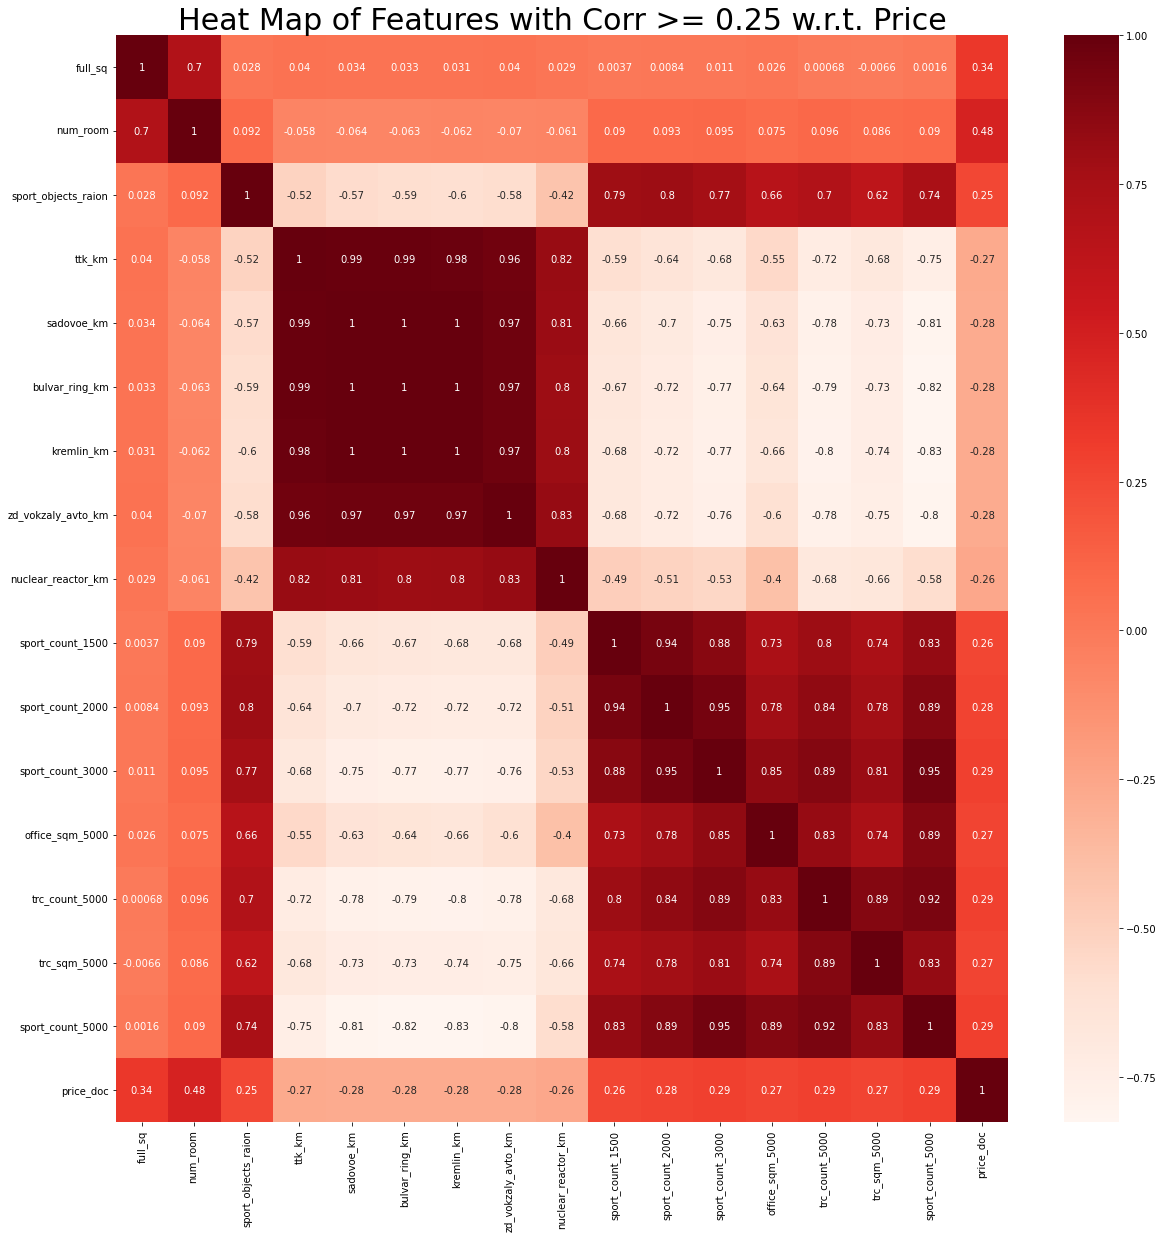

In [38]:
# generate heatmap using Pearson Correlation
plt.figure(figsize=(20,20))
plt.title('Heat Map of Features with Corr >= 0.25 w.r.t. Price', fontsize=30)
corr = df_train[relevant_fts.index].corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.savefig("images/fig21-heatmap1.svg", bbox_inches='tight')
plt.show()

**Conclusion:**

- The first set of features that are highly correlated to each other are: ttk_km, sadovoe_km, bulvar_ring_km, kremlin_km, zd_vokzaly_avto_km, nuclear_reactor_km.

- The second set of features that are highly correlated to each other are: sport_count_1500, sport_count_2000, sport_count_3000, office_sqm_5000,trc_count_5000, trc_sqm_5000, sport_count_5000.

- Thus, we can keep any 1 feature from each of these set and discard the others.

- Also, keep in mind that full_sq & num_room are highly correlated with price_doc with corr = 0.34 and 0.48 respectively.

#### Part 2: Analyze features with correlation values 0.20 <= corr < 0.25 w.r.t. price

In [39]:
target_corr = abs(corr_vals["price_doc"])
relevant_fts = target_corr[(target_corr >= 0.20) & (target_corr < 0.25)]
print("Number of relevant features in this range: {}".format(len(relevant_fts)))
print(relevant_fts)

Number of relevant features in this range: 26
thermal_power_plant_km       0.21
swim_pool_km                 0.21
stadium_km                   0.24
basketball_km                0.22
detention_facility_km        0.22
university_km                0.22
workplaces_km                0.21
office_km                    0.22
theater_km                   0.22
exhibition_km                0.21
catering_km                  0.21
office_sqm_2000              0.22
office_sqm_3000              0.23
trc_count_3000               0.24
trc_sqm_3000                 0.23
office_count_5000            0.22
cafe_count_5000              0.23
cafe_count_5000_na_price     0.23
cafe_count_5000_price_500    0.23
cafe_count_5000_price_1000   0.24
cafe_count_5000_price_1500   0.23
cafe_count_5000_price_2500   0.23
cafe_count_5000_price_4000   0.21
cafe_count_5000_price_high   0.21
church_count_5000            0.21
leisure_count_5000           0.20
Name: price_doc, dtype: float64


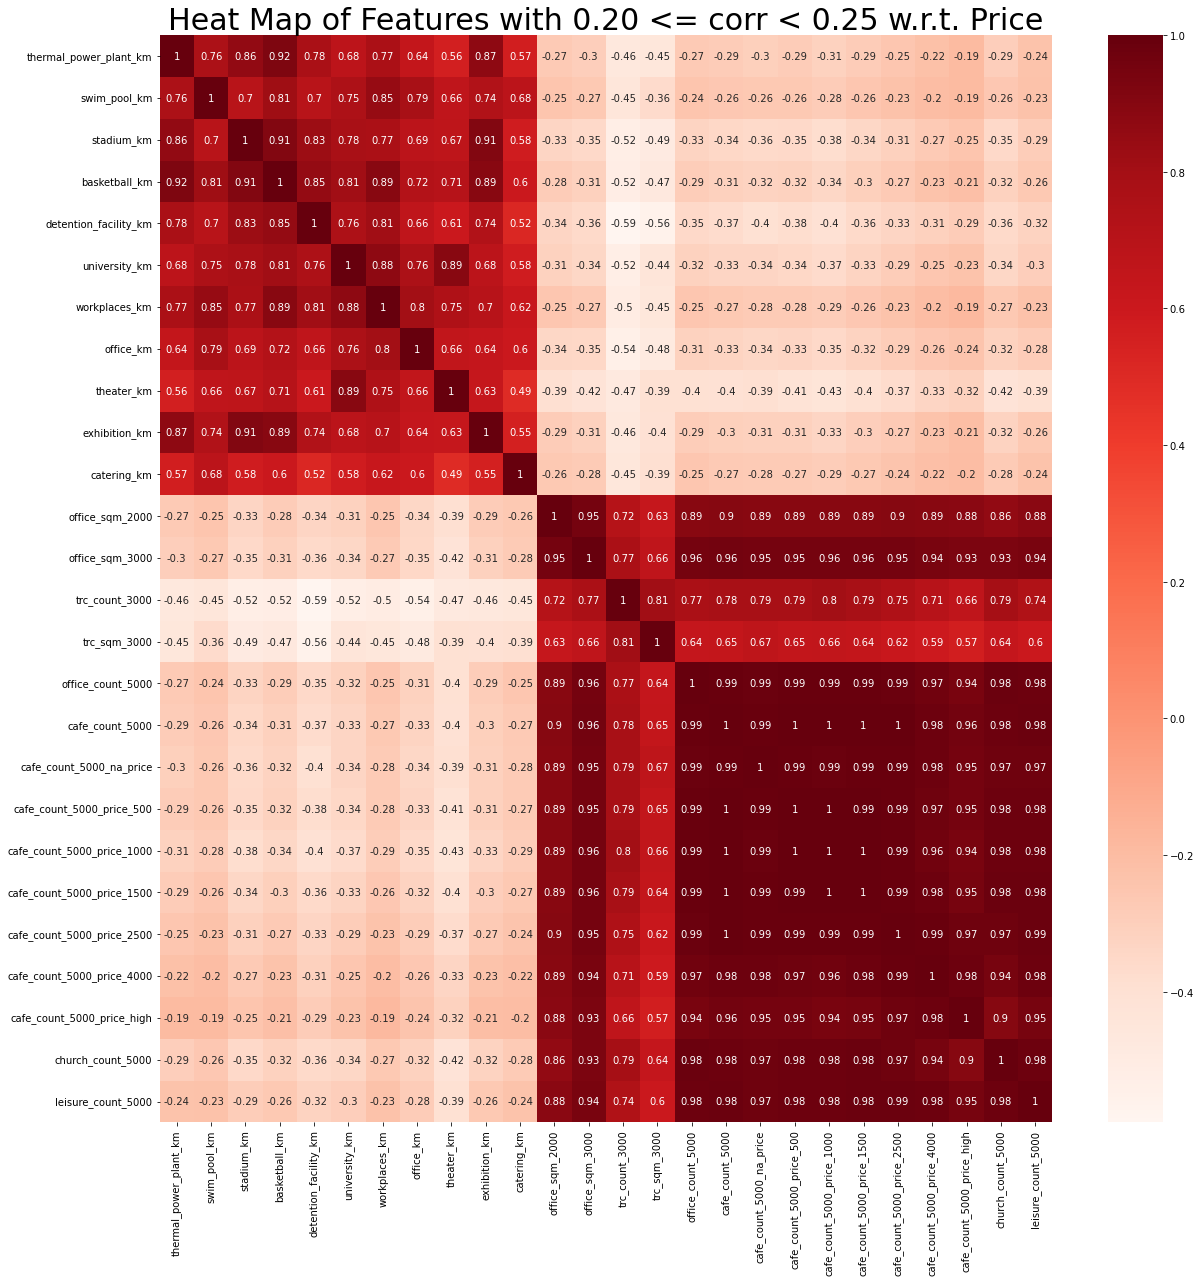

In [40]:
# generate heatmap using Pearson Correlation
plt.figure(figsize=(20,20))
plt.title('Heat Map of Features with 0.20 <= corr < 0.25 w.r.t. Price', fontsize=30)
corr = df_train[relevant_fts.index].corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.savefig("images/fig22-heatmap2.svg", bbox_inches='tight')
plt.show()

**Conclusion:**

- The first set of features that are highly correlated to each other are: thermal_power_plant_km, swim_pool_km, stadium_km, basketball_km, detention_facility_km, university_km, workplaces_km, office_km, theater_km, exhibition_km, catering_km.

- The second set of features that are highly correlated to each other are: office_sqm_2000, office_sqm_3000, trc_count_3000, trc_sqm_3000, office_count_5000, cafe_count_5000, cafe_count_5000_na_price, cafe_count_5000_price_500, cafe_count_5000_price_1000, cafe_count_5000_price_1500, cafe_count_5000_price_2500, cafe_count_5000_price_4000, cafe_count_5000_price_high, church_count_5000, leisure_count_5000.

- Thus, we can keep any 1 feature from each of these set and discard the others.

#### Part 3: Analyze features with correlation values 0.15 <= corr < 0.20 w.r.t. price

In [41]:
target_corr = abs(corr_vals["price_doc"])
relevant_fts = target_corr[(target_corr >= 0.15) & (target_corr < 0.20)]
print("Number of relevant features in this range: {}".format(len(relevant_fts)))
print(relevant_fts)

Number of relevant features in this range: 53
life_sq                             0.17
area_m                              0.17
raion_popul                         0.15
preschool_education_centers_raion   0.16
school_education_centers_raion      0.19
healthcare_centers_raion            0.19
university_top_20_raion             0.17
shopping_centers_raion              0.15
ekder_all                           0.17
ekder_male                          0.18
ekder_female                        0.17
build_count_brick                   0.17
metro_min_avto                      0.19
metro_km_avto                       0.18
metro_min_walk                      0.18
metro_km_walk                       0.18
park_km                             0.19
big_road2_km                        0.16
bus_terminal_avto_km                0.16
radiation_km                        0.19
power_transmission_line_km          0.16
ts_km                               0.16
market_shop_km                      0.17
fitness_km 

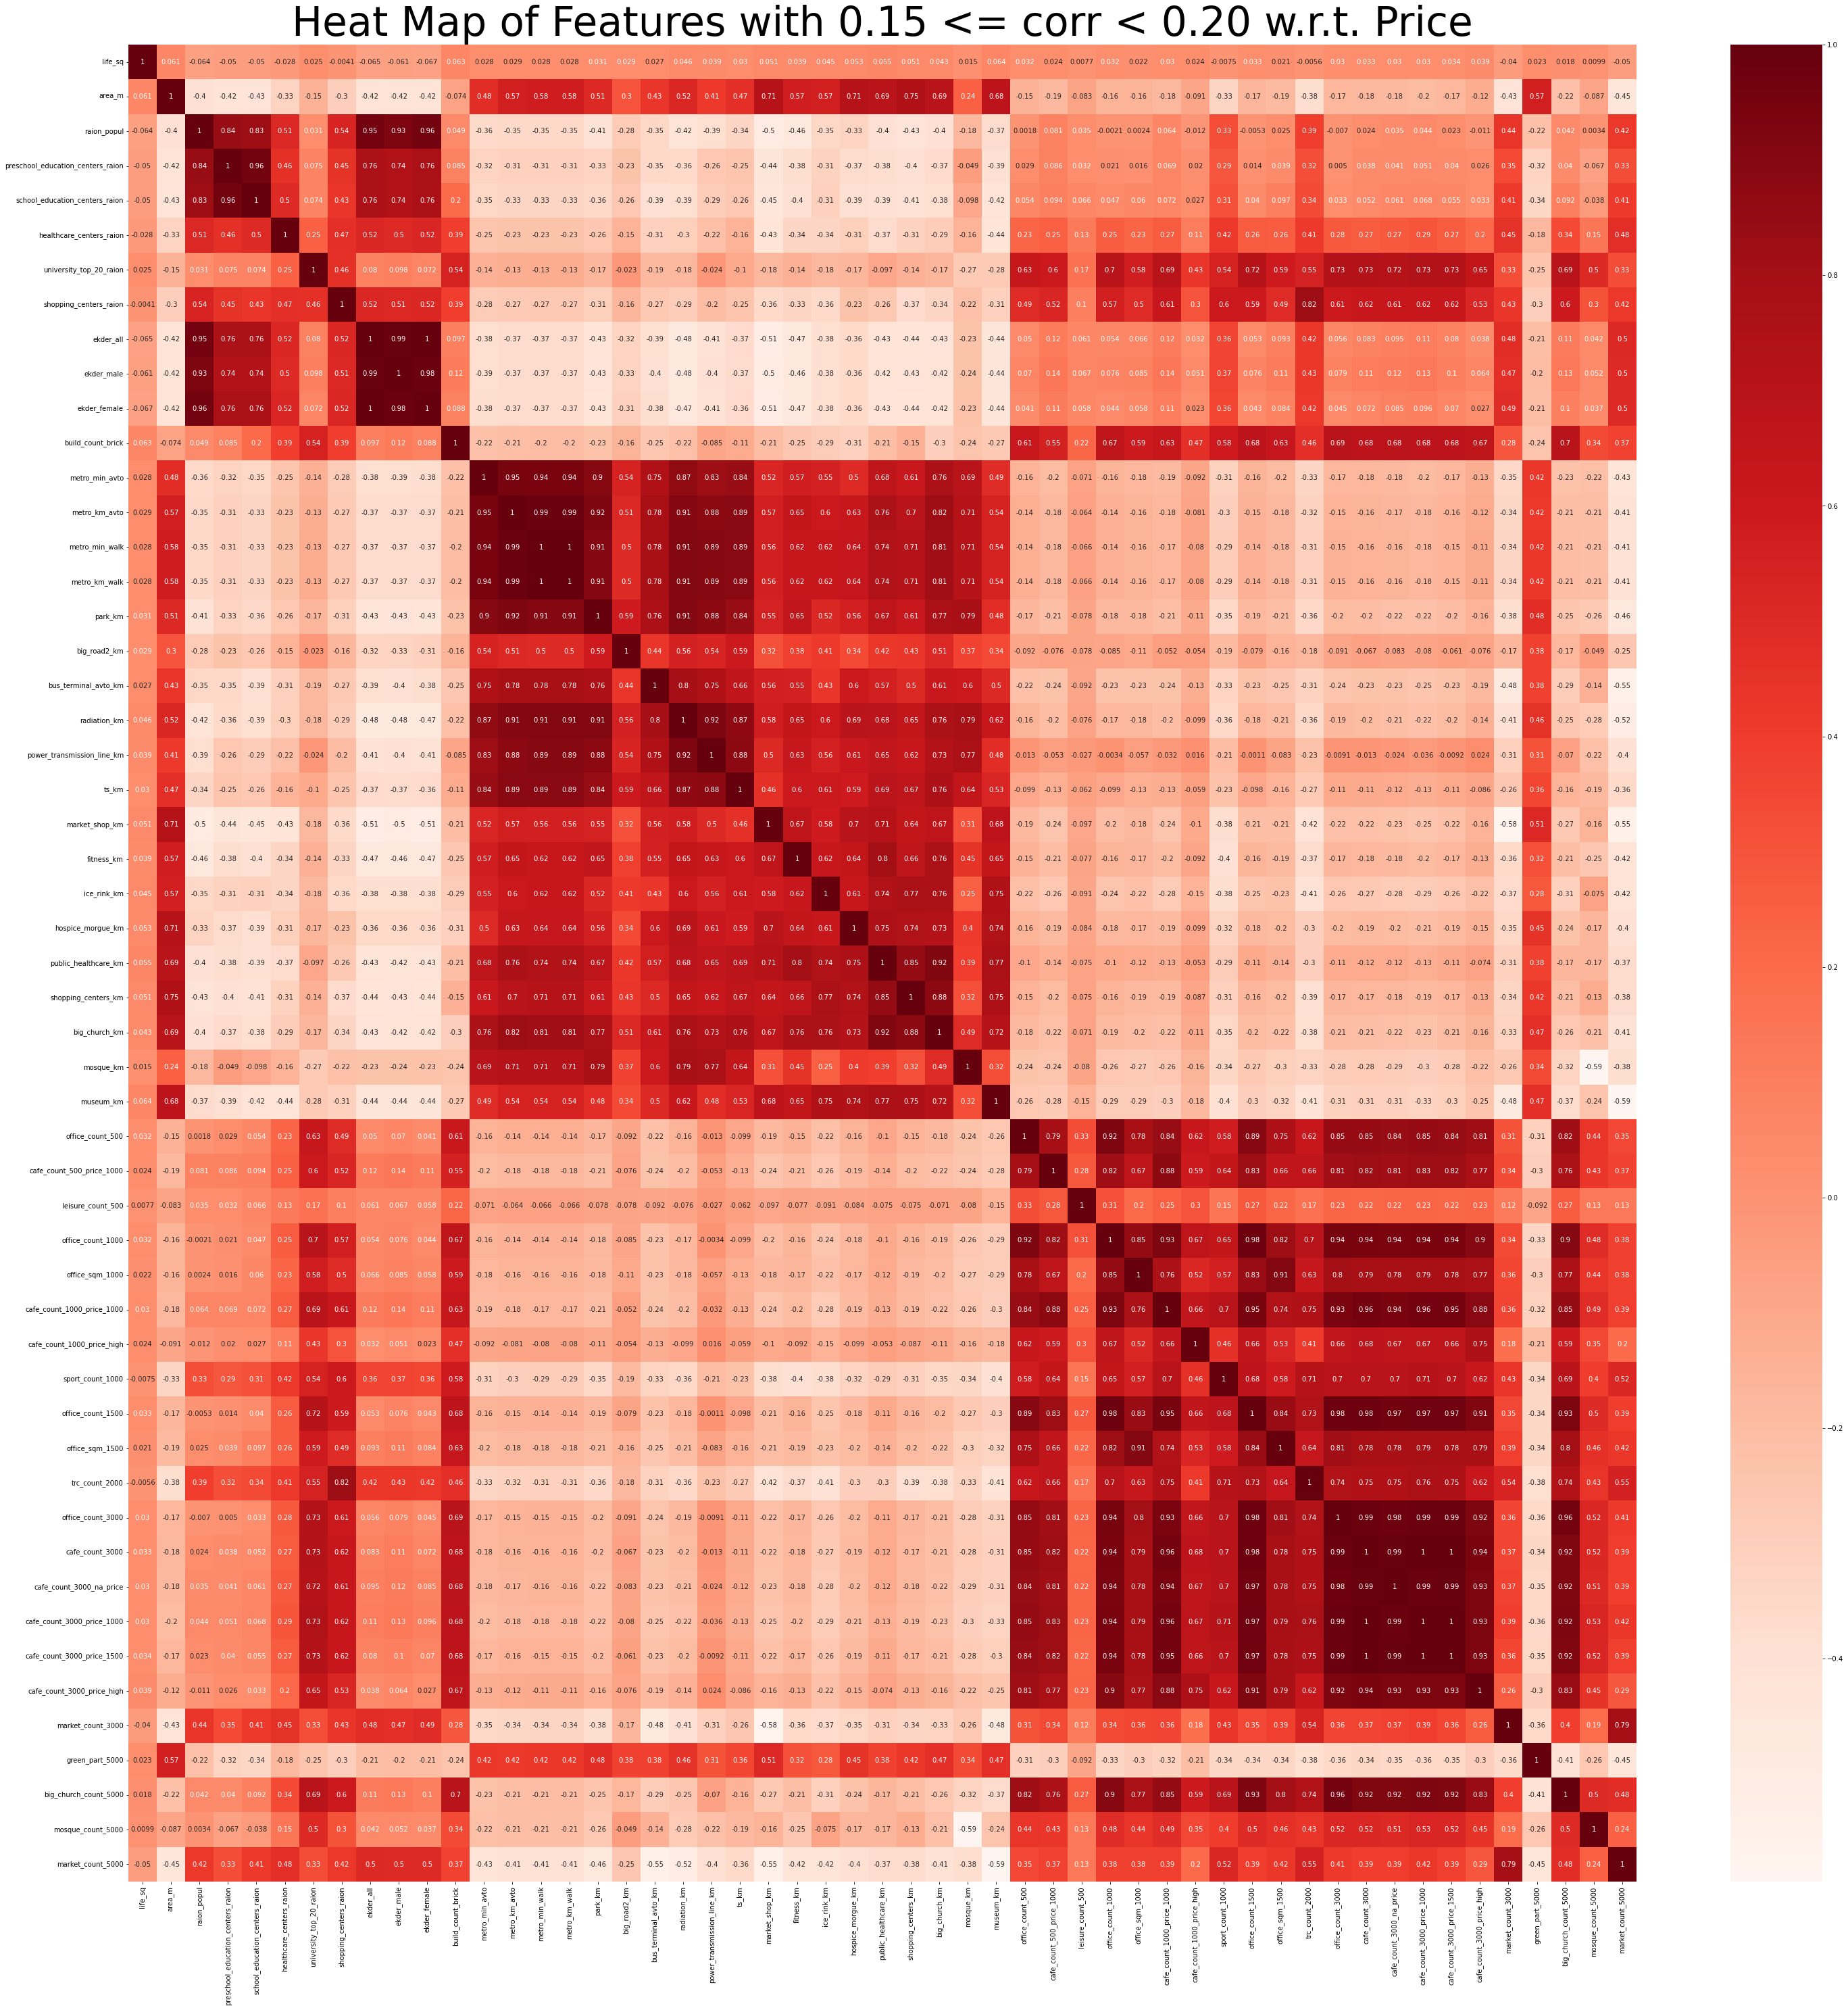

In [42]:
# generate heatmap using Pearson Correlation
plt.figure(figsize=(50, 50))
plt.title('Heat Map of Features with 0.15 <= corr < 0.20 w.r.t. Price', fontsize=60)
corr = df_train[relevant_fts.index].corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.savefig("images/fig23-heatmap3.svg", bbox_inches='tight')
plt.show()

**Conclusion:**

- The first set of features that are highly correlated to each other are: 

- The second set of features that are highly correlated to each other are: 
- Thus, we can keep any 1 feature from each of these set and discard the others.

#### Part 4: Analyze features with correlation values 0.10 <= corr < 0.15 w.r.t. price

In [43]:
target_corr = abs(corr_vals["price_doc"])
relevant_fts = target_corr[(target_corr >= 0.10) & (target_corr < 0.15)]
print("Number of relevant features in this range: {}".format(len(relevant_fts)))
print(relevant_fts)

Number of relevant features in this range: 81
id                                      0.12
floor                                   0.12
state                                   0.12
children_preschool                      0.13
children_school                         0.14
school_education_centers_top_20_raion   0.10
hospital_beds_raion                     0.15
office_raion                            0.15
young_all                               0.14
young_male                              0.14
young_female                            0.14
work_all                                0.14
work_male                               0.15
work_female                             0.14
0_6_all                                 0.13
0_6_male                                0.13
0_6_female                              0.13
7_14_all                                0.14
7_14_male                               0.14
7_14_female                             0.14
0_17_all                                0.14
0_17_male

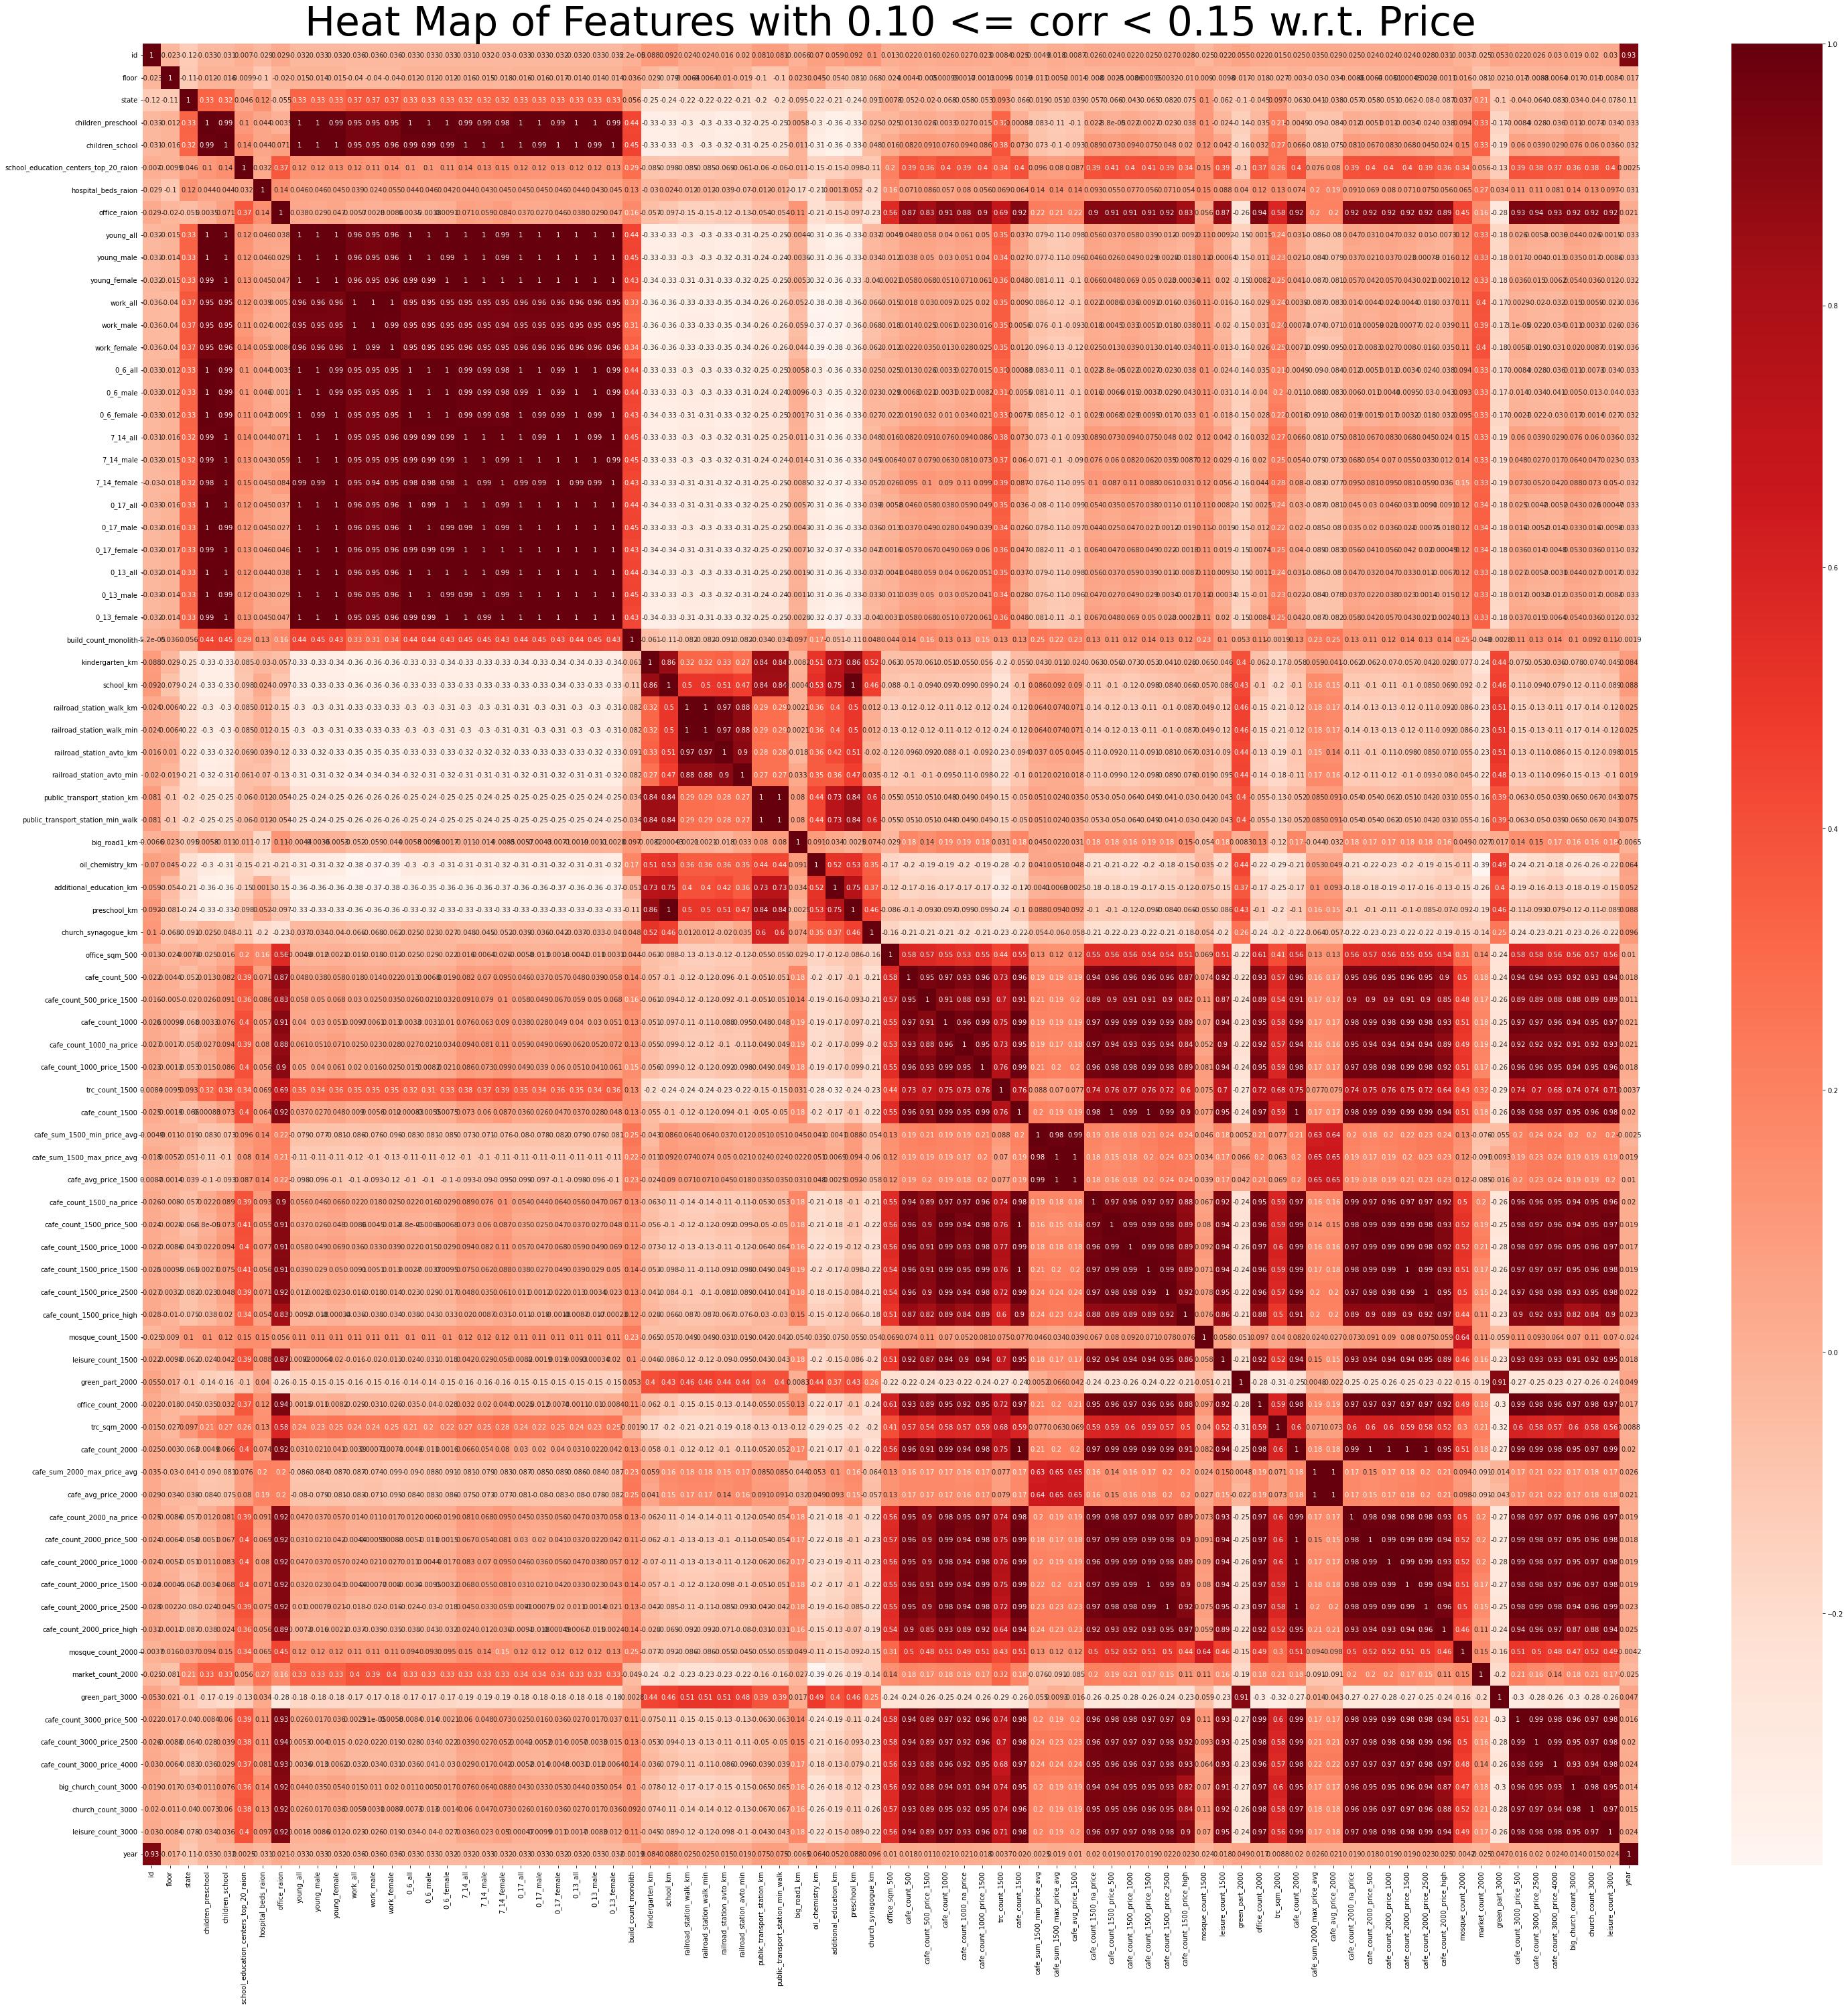

In [44]:
# generate heatmap using Pearson Correlation
plt.figure(figsize=(50, 50))
plt.title('Heat Map of Features with 0.10 <= corr < 0.15 w.r.t. Price', fontsize=60)
corr = df_train[relevant_fts.index].corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.savefig("images/fig24-heatmap4.svg", bbox_inches='tight')
plt.show()

**Conclusion:**

Features with high correlation to each other:

- children_preschool, children_school.

- young_all, young_male, young_female, work_all,work_male, work_female, 0_6_all, 0_6_male, 0_6_female, 7_14_all, 7_14_male, 7_14_female, 0_17_all, 0_17_male,0_17_female, 0_13_all, 0_13_male, 0_13_female

- railroad_station_walk_km, railroad_station_walk_min,railroad_station_avto_km, railroad_station_avto_min.

- public_transport_station_km, public_transport_station_min_walk

- cafe_count_500, cafe_count_500_price_1500, cafe_count_1000,cafe_count_1000_na_price, cafe_count_1000_price_1500,trc_count_1500, cafe_count_1500.

- cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg, cafe_avg_price_1500

- cafe_count_1500_na_price, cafe_count_1500_price_500,cafe_count_1500_price_1000, cafe_count_1500_price_1500, cafe_count_1500_price_2500, cafe_count_1500_price_high.

- cafe_count_3000_price_500, cafe_count_3000_price_2500,cafe_count_3000_price_4000, big_church_count_3000, church_count_3000, leisure_count_3000.

**Conclusion from Heatmaps:**

- There is the presence of high collinearity between the features in the dataset, and this could potentially affect the performance of the training. Thus, we have analyzed which features to remove by analyzing the correlation via a heat map.

- Since the dataset is large, we have split the correlation matrix into 4 portions to analyze the correlation value ranges w.r.t. price.

- We only look at features with corr > 0.1. This is because features with corr < 0.1 will not be of significance to the model we will be building. Thus, features with corr < 0.1 can be discarded.

### Conclusion of EDA:

In our Exploratory Data Analysis, we have performed the following: 

- Find out the percentage of missing values in all the features

- Univariate Analysis for `price_doc` target feature

- Bivariate Analysis for different selected features against `price_doc`

- Find out which features have high collinearity.

## 1. Data Preparation for the Model

### Drop all columns that is missing more than 10% of data

In [45]:
print(df_missing_values)

                                 Variables    Raw  Percentage
24                     hospital_beds_raion  14441       47.39
7                               build_year  13605       44.65
10                                   state  13559       44.50
162                     cafe_avg_price_500  13281       43.59
161             cafe_sum_500_max_price_avg  13281       43.59
160             cafe_sum_500_min_price_avg  13281       43.59
5                                max_floor   9572       31.41
6                                 material   9572       31.41
8                                 num_room   9572       31.41
9                                 kitch_sq   9572       31.41
18                         preschool_quota   6688       21.95
21                            school_quota   6685       21.94
184            cafe_sum_1000_max_price_avg   6524       21.41
185                    cafe_avg_price_1000   6524       21.41
183            cafe_sum_1000_min_price_avg   6524       21.41
3       

In [46]:
# get columns with missing >= 10%
missing_gte_10 = df_missing_values.loc[df_missing_values['Percentage'] >= 10].copy()
# drop from training data
dfs['train'].drop(columns=missing_gte_10['Variables'].values, inplace=True)
dfs['train'].drop(columns=['year','day'], inplace=True)

### For remaining columns with missing data < 10%, fill in missing values by median

In [47]:
dfs['train']['cafe_sum_2000_max_price_avg'].median()

1156.25

In [48]:
# get columns with missing < 10%
missing_lt_10 = df_missing_values.loc[df_missing_values['Percentage'] < 10].copy()
values = {x: dfs['train'][x].median() for x in missing_lt_10['Variables'].values}
dfs['train'].fillna(value=values, inplace=True)

### Price_doc outliers

0th quantile of price_doc :  0.01
1st quantile of price_doc :  0.1
Q1 quantile of price_doc :  0.4740002
Q2 quantile of price_doc :  0.6274411
Q3 quantile of price_doc :  0.83
90th quantile of price_doc :  1.18
95th quantile of price_doc :  1.45
99th quantile of price_doc :  2.453207539999992
100th quantile of price_doc :  11.1111112


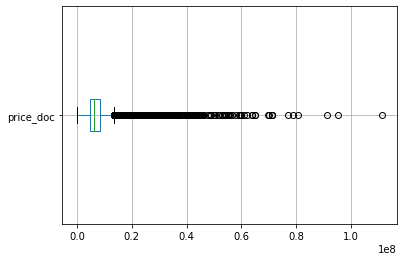

In [49]:
boxplot = dfs['train'].boxplot(column=['price_doc'], vert=False)
print("0th quantile of price_doc : ", np.quantile(dfs['train']['price_doc'], 0)/10000000)
print("1st quantile of price_doc : ", np.quantile(dfs['train']['price_doc'], .01)/10000000)
print("Q1 quantile of price_doc : ", np.quantile(dfs['train']['price_doc'], .25)/10000000)
print("Q2 quantile of price_doc : ", np.quantile(dfs['train']['price_doc'], .50)/10000000)
print("Q3 quantile of price_doc : ", np.quantile(dfs['train']['price_doc'], .75)/10000000)
print("90th quantile of price_doc : ", np.quantile(dfs['train']['price_doc'], .9)/10000000)
print("95th quantile of price_doc : ", np.quantile(dfs['train']['price_doc'], .95)/10000000)
print("99th quantile of price_doc : ", np.quantile(dfs['train']['price_doc'], .99)/10000000)
print("100th quantile of price_doc : ", np.quantile(dfs['train']['price_doc'], 1)/10000000)

From analysis above, it can be seen that there are extreme outliers in price_doc, with large difference from 95 to 99th quartile, hence we will take only values of price_doc between 1% to 95%

(28715, 257)


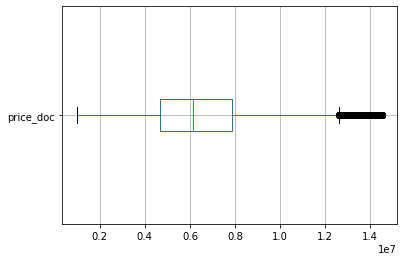

In [50]:
train_data = dfs['train'].loc[(dfs['train']['price_doc'] >= np.quantile(dfs['train']['price_doc'], .01)) & (dfs['train']['price_doc'] <= np.quantile(dfs['train']['price_doc'], .95))]
boxplot = train_data.boxplot(column=['price_doc'],vert=False)

print(train_data.shape)

## Process 'object' type data

In [51]:
# Get all columns with data type of 'object'
objColumns = train_data.dtypes[(train_data.dtypes == object)]
objList = list(objColumns.index)
objList = sorted(objList)
print("===== Number of cols with object datatype: {} =====".format(len(objList)))
for x in objList:
    print(x)

===== Number of cols with object datatype: 15 =====
big_market_raion
big_road1_1line
culture_objects_top_25
detention_facility_raion
ecology
incineration_raion
nuclear_reactor_raion
oil_chemistry_raion
product_type
radiation_raion
railroad_1line
railroad_terminal_raion
sub_area
thermal_power_plant_raion
water_1line


In [52]:
# print the count of unique vals
for x in objList:
    print(train_data[x].value_counts())
    print('='*100)

no     25928
yes     2787
Name: big_market_raion, dtype: int64
no     28050
yes      665
Name: big_road1_1line, dtype: int64
no     27095
yes     1620
Name: culture_objects_top_25, dtype: int64
no     25897
yes     2818
Name: detention_facility_raion, dtype: int64
no data         7629
poor            7400
good            6837
excellent       3610
satisfactory    3239
Name: ecology, dtype: int64
no     26433
yes     2282
Name: incineration_raion, dtype: int64
no     27929
yes      786
Name: nuclear_reactor_raion, dtype: int64
no     28424
yes      291
Name: oil_chemistry_raion, dtype: int64
Investment       18103
OwnerOccupier    10612
Name: product_type, dtype: int64
no     18831
yes     9884
Name: radiation_raion, dtype: int64
no     27862
yes      853
Name: railroad_1line, dtype: int64
no     27715
yes     1000
Name: railroad_terminal_raion, dtype: int64
Poselenie Sosenskoe               1772
Nekrasovka                        1597
Poselenie Vnukovskoe              1370
Poselenie Mosk

We can use label encoder to convert all the categorical data to numeric

In [53]:
Y = train_data['price_doc'].copy()
X = train_data.copy()
drop_cols = ['price_doc','timestamp','id']
X.drop(columns=drop_cols, inplace=True)
print(len(Y))
print(len(X))

28715
28715


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

22972
5743
22972
5743


In [55]:
# Use Label encoder to convert categorical to numeric
for i in tqdm(objList):
    le = preprocessing.LabelEncoder() 
    le.fit(X_train[i])
    X_train[i] = le.transform(X_train[i])
    X_test[i] = le.transform(X_test[i])

100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 145.50it/s]


## Process remaining data types (not 'object')

In [56]:
# Get all columns with data type that is not 'object' (numerical)
nonObjColumns = X.dtypes[(X.dtypes != object)]
nonObjList = list(nonObjColumns.index)

print("No. of cols with numerical data type: {}".format(len(nonObjList)))
for x in nonObjList:
    print(x)

No. of cols with numerical data type: 239
full_sq
floor
area_m
raion_popul
green_zone_part
indust_part
children_preschool
preschool_education_centers_raion
children_school
school_education_centers_raion
school_education_centers_top_20_raion
healthcare_centers_raion
university_top_20_raion
sport_objects_raion
additional_education_raion
culture_objects_top_25_raion
shopping_centers_raion
office_raion
full_all
male_f
female_f
young_all
young_male
young_female
work_all
work_male
work_female
ekder_all
ekder_male
ekder_female
0_6_all
0_6_male
0_6_female
7_14_all
7_14_male
7_14_female
0_17_all
0_17_male
0_17_female
16_29_all
16_29_male
16_29_female
0_13_all
0_13_male
0_13_female
ID_metro
metro_min_avto
metro_km_avto
metro_min_walk
metro_km_walk
kindergarten_km
school_km
park_km
green_zone_km
industrial_km
water_treatment_km
cemetery_km
incineration_km
railroad_station_walk_km
railroad_station_walk_min
ID_railroad_station_walk
railroad_station_avto_km
railroad_station_avto_min
ID_railroad_stat

In [57]:
# Perform min-max normalisation on the data
for i in tqdm(nonObjList):
    min = X_train[i].min()
    max = X_train[i].max()
    X_train[i] = (X_train[i] - min)/(max - min)
    X_test[i] =  (X_test[i] - min)/(max - min)

# Print the first 10 rows of normalization results
X_train.head(10)

100%|███████████████████████████████████████████████████████████████████████████████| 239/239 [00:01<00:00, 165.13it/s]


full_sq  floor  product_type  sub_area  area_m  raion_popul  \
7869      0.01   0.09             1        94    0.19         0.08   
5149      0.01   0.07             0       140    0.01         0.30   
3823      0.01   0.14             1       118    0.04         0.63   
16895     0.01   0.25             1        72    0.05         0.07   
20023     0.01   0.18             0        39    0.01         0.32   
2478      0.01   0.11             0         5    0.01         0.34   
1351      0.02   0.25             1        85    0.05         0.21   
27523     0.01   0.41             0        10    0.06         0.58   
24458     0.01   0.02             1        87    0.17         0.00   
9206      0.01   0.50             0       133    0.05         0.45   

       green_zone_part  indust_part  children_preschool  \
7869              0.58         0.15                0.07   
5149              0.27         0.29                0.26   
3823              0.44         0.00                0.53   
16895             0.06         0.47                0.08   
20023             0.18         0.44                0.25   
2478              0.13         0.23                0.22   
1351              0.21         0.29                0.15   
27523             0.36         0.10                0.48   
24458             0.64         0.07                0.00   
9206              0.39         0.00                0.36   

       preschool_education_centers_raion  children_school  \
7869                                0.00             0.07   
5149                                0.15             0.24   
3823                                0.38             0.59   
16895                               0.38             0.07   
20023                               0.31             0.25   
2478                                0.23             0.24   
1351                                0.15             0.17   
27523                               0.46             0.55   
24458                               0.00             0.00   
9206                                0.62             0.35   

       school_education_centers_raion  school_education_centers_top_20_raion  \
7869                             0.00                                   0.00   
5149                             0.21                                   0.00   
3823                             0.36                                   0.00   
16895                            0.36                                   0.00   
20023                            0.29                                   0.50   
2478                             0.21                                   0.00   
1351                             0.29                                   0.00   
27523                            0.43                                   0.00   
24458                            0.00                                   0.00   
9206                             0.64                                   1.00   

       healthcare_centers_raion  university_top_20_raion  sport_objects_raion  \
7869                       0.00                     0.00                 0.10   
5149                       0.67                     0.00                 0.21   
3823                       0.50                     0.00                 0.03   
16895                      0.00                     0.00                 0.00   
20023                      0.00                     0.00                 0.14   
2478                       0.17                     0.00                 0.21   
1351                       0.67                     0.00                 0.34   
27523                      0.33                     0.00                 0.28   
24458                      0.00                     0.00                 0.00   
9206                       0.17                     0.33                 0.48   

       additional_education_raion  culture_objects_top_25  \
7869                         0.19                       0   
5149               

In [58]:
# double check that we have no more null values
print(X_train.isnull().values.any())
print(y_train.isnull().values.any())

False
False


## 2. Classification of Data and Feature Selection



In [59]:
# select random forest classifier model
classifierSel = SelectFromModel(RandomForestClassifier(n_jobs=-1, n_estimators=50, max_depth=5))
classifierSel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=5, n_estimators=50,
                                                 n_jobs=-1))

In [60]:
# number of important features
feats= X_train.columns[(classifierSel.get_support())]
print("Number of Impt Features: " + str(len(feats)) + "\n")

# list feature and their importance
for featName, impt in zip(X_train.columns, classifierSel.estimator_.feature_importances_):
    print(featName, ": ", impt)

Number of Impt Features: 85

full_sq :  0.08785559883247758
floor :  0.027014350961806335
product_type :  0.06948869459718135
sub_area :  0.0005505614259375174
area_m :  0.0018356565552639717
raion_popul :  0.004633633478011612
green_zone_part :  0.0010927872735191587
indust_part :  0.0
children_preschool :  0.005253396862073264
preschool_education_centers_raion :  0.001551917690294851
children_school :  0.004614829883820506
school_education_centers_raion :  0.003834084598140356
school_education_centers_top_20_raion :  0.0
healthcare_centers_raion :  0.0025207049002680592
university_top_20_raion :  0.0
sport_objects_raion :  0.00154916404138122
additional_education_raion :  0.00281612861438426
culture_objects_top_25 :  0.0
culture_objects_top_25_raion :  0.0006763871144212381
shopping_centers_raion :  0.0007653496787401949
office_raion :  0.00040019434151493914
thermal_power_plant_raion :  0.0
incineration_raion :  0.0014978610845608148
oil_chemistry_raion :  0.0
radiation_raion :  0.0

## 3. Top 20 Features Analysis

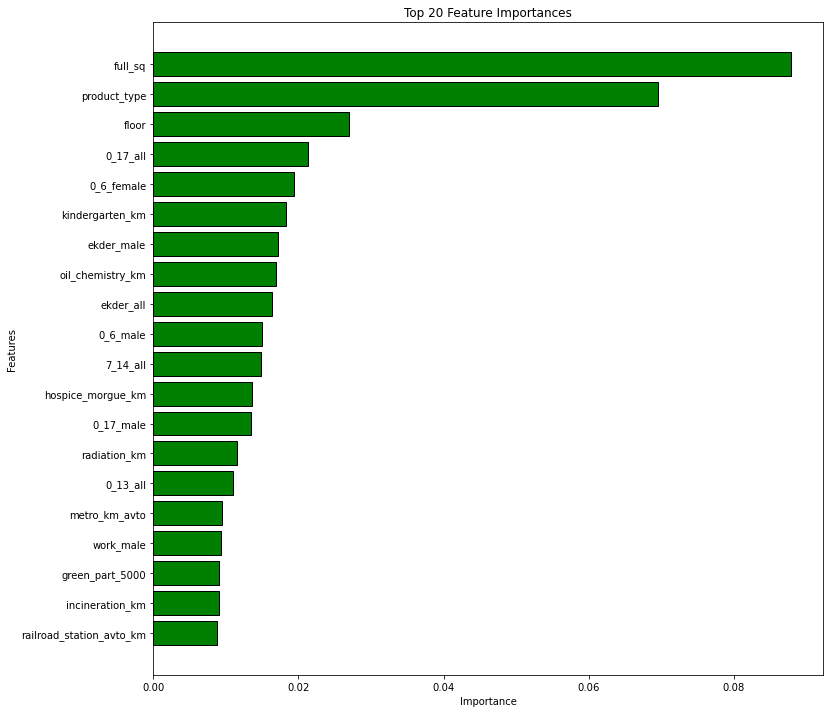

In [61]:
feat_data = X_train.columns.values
importance = classifierSel.estimator_.feature_importances_

# narrow down to top 20 features
indices = np.argsort(importance)[:-21:-1]
indices_desc = indices[::-1]

plt.figure(figsize=(12,12))
plt.barh(range(len(indices_desc)), importance[indices_desc], color="g", edgecolor="k")
plt.yticks(range(len(indices_desc)), [feat_data[i] for i in indices_desc])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Top 20 Feature Importances")
plt.show()

### Bivariate Analysis on Top 20 Features

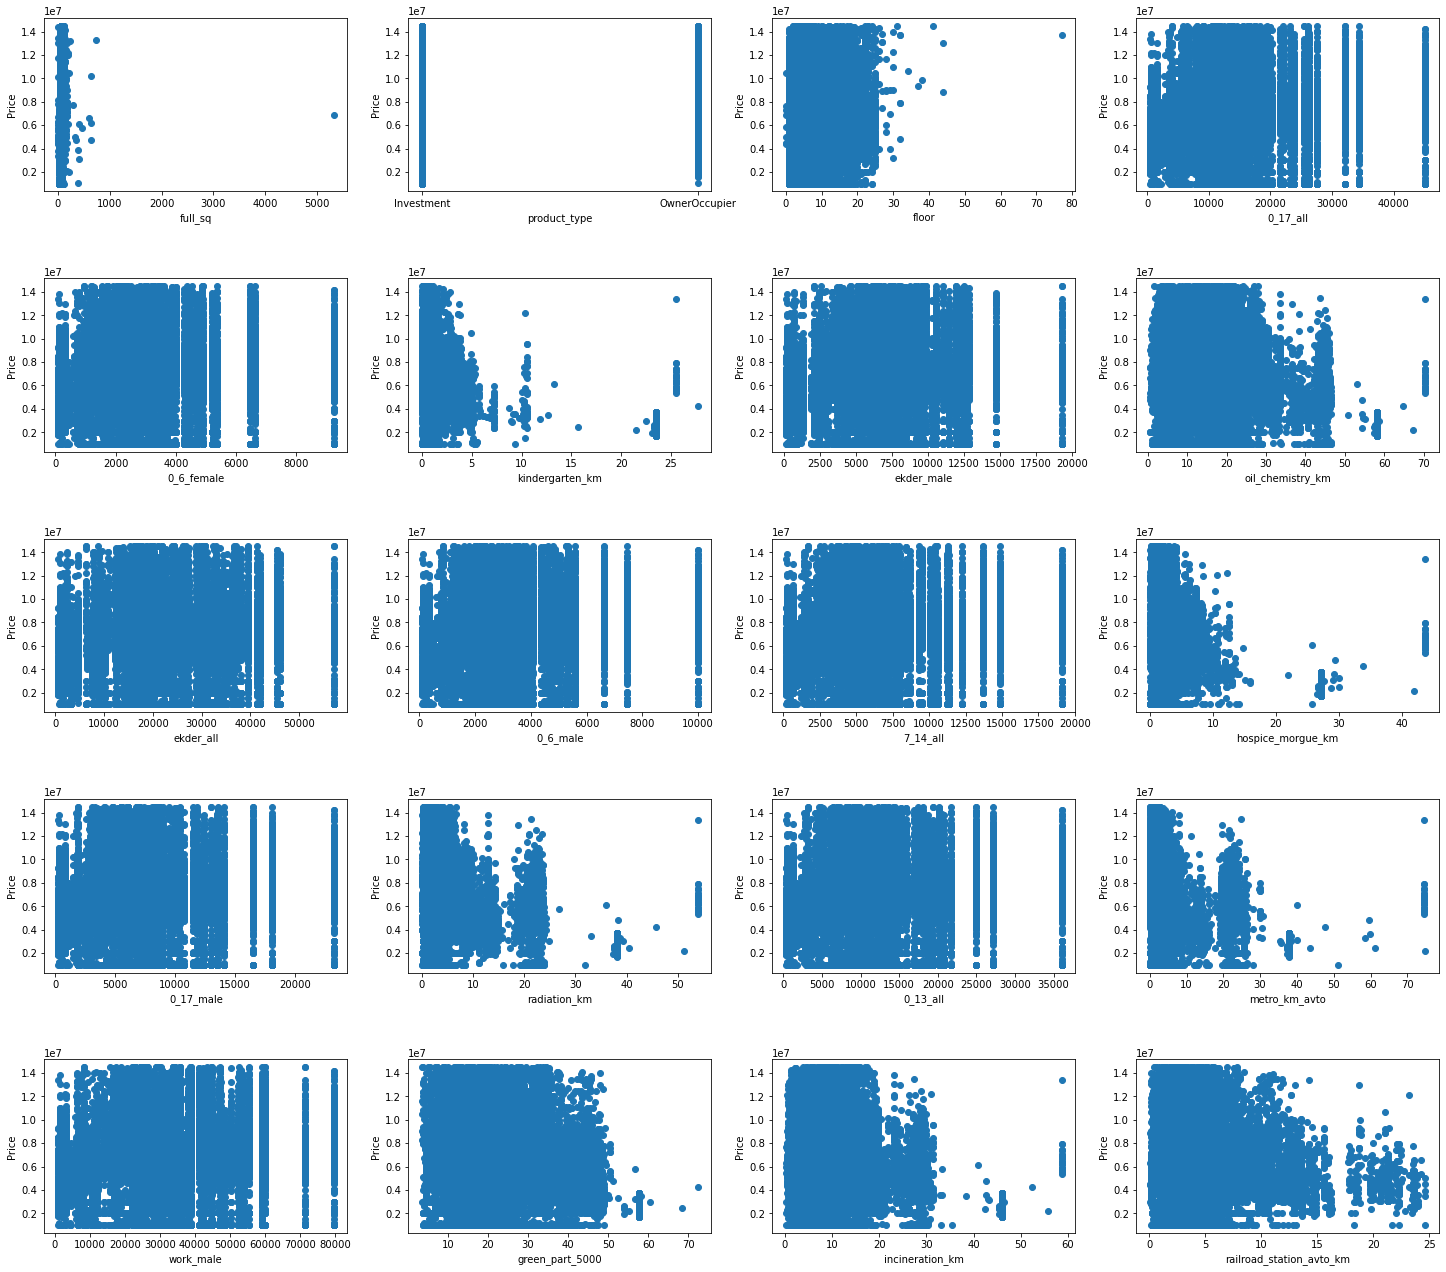

In [62]:
top_twenty = [feat_data[i] for i in indices]

plt.figure(figsize=(25,25))
index = 0
for i in top_twenty:
    plt.subplot(5,4,index+1)
    plt.subplots_adjust(top=0.8, hspace=0.5, wspace=0.2)
    plt.scatter(train_data[i], train_data["price_doc"])
    plt.xlabel(i)
    plt.ylabel("Price")
    index+=1

plt.show()

### From these graphs, we can say that the price of the house is high if all these facilities is nearer to the house:

1. kindergarten_km : Play School 
2. hospice_morgue_km : Hospital
3. incineration_km : waste treatment Plant
4. basketball_km : BasketBall Court
5. railroad_km : Railway Sation
6. sadovoe_km
7. railroad_station_walk_km: Railway Station
8. museum_km : Museum
9. public_tansport_sation_min_km : Public Transport
10. metro_km_walk : Metro Station
11. school_km : School
12. big_church_km : Church
13. green_zone_km : Green area from the House
14. hospice_morgue_km
15. Power_transmission_line_km

### Price of the house is inversely proportional to the distance of these facilities.
### In other words we can say that the price of the house is high if these facilities are closer to the house.